In [3476]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
# help in finding and showing the desired k for the elbow method
from kneed import KneeLocator
# dendogram for kmeans
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
# dimension reduction
from sklearn.decomposition import PCA
# visualization
import visuals as vs
# scaler for easier understanding
from sklearn.preprocessing import StandardScaler

In [3477]:
df = pd.read_csv('WorkDB-28.02.25.csv', parse_dates=['Snapshot Time', 'Departure Date', 'Return Date'], dayfirst=True)

In [3478]:
df.head()

,Origin,Destination,TTT,LOS,Departure Time,Departure Date,Arrival Time,Return Departure Time,Return Date,Return Arrival Time,...,Return Flight Connections,Return Connection Duration(min),Return Flight Connection Airport,Carry-ons,Checked Bags,Price(NIS),Snapshot Time,Site,Total Onward Flight Duration(min),Total Return Flight Duration(min)
0,Paris,Rome,1,1,15:45,2025-03-01,17:50,10:05,2025-03-02,12:20,...,0,0,NaN,1,0,1332,2025-02-28,Momondo,125,135
1,Paris,Rome,1,1,7:40,2025-03-01,9:45,19:55,2025-03-02,11:40,...,1,760,MPL,1,0,1247,2025-02-28,Momondo,125,945
2,Paris,Rome,1,1,15:45,2025-03-01,17:50,6:00,2025-03-02,8:15,...,0,0,NaN,1,0,1332,2025-02-28,Momondo,125,135
3,Paris,Rome,1,1,6:55,2025-03-01,9:00,10:05,2025-03-02,12:20,...,0,0,NaN,1,0,1332,2025-02-28,Momondo,125,135
4,Paris,Rome,1,1,6:55,2025-03-01,9:00,6:00,2025-03-02,8:15,...,0,0,NaN,1,0,1332,2025-02-28,Momondo,125,135


In [3479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179504 entries, 0 to 179503
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             179504 non-null  object        
 1   Destination                        179504 non-null  object        
 2   TTT                                179504 non-null  int64         
 3   LOS                                179504 non-null  int64         
 4   Departure Time                     179504 non-null  object        
 5   Departure Date                     179504 non-null  datetime64[ns]
 6   Arrival Time                       179504 non-null  object        
 7   Return Departure Time              179504 non-null  object        
 8   Return Date                        179504 non-null  datetime64[ns]
 9   Return Arrival Time                179504 non-null  object        
 10  Onward Departure Air

In [3480]:
df.describe()

,TTT,LOS,Departure Date,Return Date,Onward Flight Connections,Onward Connection Duration(min),Return Flight Connections,Return Connection Duration(min),Carry-ons,Checked Bags,Price(NIS),Snapshot Time,Total Onward Flight Duration(min),Total Return Flight Duration(min)
count,179504.000000,179504.000000,179504,179504,179504.000000,179504.000000,179504.000000,179504.000000,179504.000000,179504.000000,179504.000000,179504,179504.000000,179504.000000
mean,15.223204,3.003148,2025-03-15 05:21:24.820394496,2025-03-18 05:25:56.769765376,0.010178,1.318160,0.010289,1.328271,0.111697,0.097151,576.385813,2025-02-28 00:00:00,124.749337,124.729354
min,1.000000,1.000000,2025-03-01 00:00:00,2025-03-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,122.000000,2025-02-28 00:00:00,60.000000,60.000000
25%,8.000000,2.000000,2025-03-08 00:00:00,2025-03-11 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,390.000000,2025-02-28 00:00:00,80.000000,80.000000
50%,15.000000,3.000000,2025-03-15 00:00:00,2025-03-18 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,541.000000,2025-02-28 00:00:00,130.000000,130.000000
75%,23.000000,4.000000,2025-03-23 00:00:00,2025-03-26 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,701.000000,2025-02-28 00:00:00,150.000000,150.000000
max,30.000000,5.000000,2025-03-30 00:00:00,2025-04-04 00:00:00,2.000000,1870.000000,1.000000,1355.000000,1.000000,2.000000,2509.000000,2025-02-28 00:00:00,2165.000000,1635.000000
std,8.713007,1.414732,NaN,NaN,0.100483,21.731453,0.100914,21.184835,0.314994,0.297328,258.456373,NaN,44.470720,44.312308


In [3481]:
# filtering the rows where the onward and return airlines are the same (.copy() is to create an independent copy of the dataframe so that it doesn't affect the original dataframe)
df_filtered = df[df['Onward Airlines'] == df['Return Airlines']].copy()

In [3482]:
# taking only the columns that we think can help decide the pricing policy
df_filtered = df_filtered[["Price(NIS)", "Onward Airlines", "TTT", "LOS", "Departure Time", "Arrival Time",
                           "Return Departure Time", "Return Arrival Time", "Checked Bags", "Carry-ons",
                            "Onward Flight Connections", "Return Flight Connections",
                            "Total Onward Flight Duration(min)", "Total Return Flight Duration(min)"]]
# changing the name
df_filtered.rename(columns={'Onward Airlines': 'Airline'}, inplace=True)

# converting the time to datetime format instead of string for categorization
df_filtered['Departure Time'] = pd.to_datetime(df_filtered['Departure Time'], format='%H:%M').dt.time
df_filtered['Arrival Time'] = df_filtered['Arrival Time'].str.extract(r'(\d{2}:\d{2})')[0]
df_filtered['Arrival Time'] = pd.to_datetime(df_filtered['Arrival Time'], format='%H:%M').dt.time
df_filtered['Return Departure Time'] = pd.to_datetime(df_filtered['Return Departure Time'], format='%H:%M').dt.time
df_filtered['Return Arrival Time'] = df_filtered['Return Arrival Time'].str.extract(r'(\d{2}:\d{2})')[0]
df_filtered['Return Arrival Time'] = pd.to_datetime(df_filtered['Return Arrival Time'], format='%H:%M').dt.time

In [3483]:
# categorizing the time into Morning, Noon, Evening, Night
def categorize_time(time):
    hour = time.hour
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Noon'
    else:
        return 'Evening'

In [3484]:
# conveting the departure time to categories (non-ordinal(nominal) so used dummies)
df_filtered['Departure Time Category'] = df_filtered['Departure Time'].apply(categorize_time)
df_filtered['Arrival Time Category'] = df_filtered['Arrival Time'].apply(categorize_time)
df_filtered['Return Departure Time Category'] = df_filtered['Return Departure Time'].apply(categorize_time)
df_filtered['Return Arrival Time Category'] = df_filtered['Return Arrival Time'].apply(categorize_time)

# dropping the original time columns
df_filtered.drop('Departure Time', axis=1, inplace=True)
df_filtered.drop('Arrival Time', axis=1, inplace=True)
df_filtered.drop('Return Departure Time', axis=1, inplace=True)
df_filtered.drop('Return Arrival Time', axis=1, inplace=True)

# creating dummies for the categorical columns
df_filtered = pd.get_dummies(df_filtered, columns=["Departure Time Category"])
df_filtered = pd.get_dummies(df_filtered, columns=["Arrival Time Category"])
df_filtered = pd.get_dummies(df_filtered, columns=["Return Departure Time Category"])
df_filtered = pd.get_dummies(df_filtered, columns=["Return Arrival Time Category"])

In [3485]:
df_filtered.head()

,Price(NIS),Airline,TTT,LOS,Checked Bags,Carry-ons,Onward Flight Connections,Return Flight Connections,Total Onward Flight Duration(min),Total Return Flight Duration(min),...,Arrival Time Category_Night,Arrival Time Category_Noon,Return Departure Time Category_Evening,Return Departure Time Category_Morning,Return Departure Time Category_Night,Return Departure Time Category_Noon,Return Arrival Time Category_Evening,Return Arrival Time Category_Morning,Return Arrival Time Category_Night,Return Arrival Time Category_Noon
0,1332,Air France,1,1,0,1,0,0,125,135,...,False,True,False,True,False,False,False,False,False,True
1,1247,Transavia France,1,1,0,1,0,1,125,945,...,False,False,True,False,False,False,False,True,False,False
2,1332,Air France,1,1,0,1,0,0,125,135,...,False,True,False,True,False,False,True,False,False,False
3,1332,Air France,1,1,0,1,0,0,125,135,...,False,False,False,True,False,False,False,False,False,True
4,1332,Air France,1,1,0,1,0,0,125,135,...,False,False,False,True,False,False,True,False,False,False


In [3486]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85513 entries, 0 to 179483
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Price(NIS)                              85513 non-null  int64 
 1   Airline                                 85513 non-null  object
 2   TTT                                     85513 non-null  int64 
 3   LOS                                     85513 non-null  int64 
 4   Checked Bags                            85513 non-null  int64 
 5   Carry-ons                               85513 non-null  int64 
 6   Onward Flight Connections               85513 non-null  int64 
 7   Return Flight Connections               85513 non-null  int64 
 8   Total Onward Flight Duration(min)       85513 non-null  int64 
 9   Total Return Flight Duration(min)       85513 non-null  int64 
 10  Departure Time Category_Evening         85513 non-null  bool  
 11  Depart

In [3487]:
# checking for airlines with less than 1% of the data (not enough data to draw conclusions)
airlines_data = df_filtered.groupby('Airline', observed=True)

In [3488]:
airlines_data.describe()

Price(NIS)                                           \
                           count         mean         std     min     25%   
Airline                                                                     
Air France                7586.0   851.589639  298.167013   424.0   655.0   
Austrian Airlines            1.0  1099.000000         NaN  1099.0  1099.0   
British Airways           3044.0   891.395204  241.510035   435.0   736.0   
ITA Airways               4169.0   837.912449  280.988850   467.0   692.0   
Iberia                     227.0   844.088106  340.982224   520.0   592.0   
Jet2                       161.0   680.472050  166.548306   418.0   581.0   
KLM                          1.0  1617.000000         NaN  1617.0  1617.0   
Lufthansa                    2.0  1169.000000    0.000000  1169.0  1169.0   
Ryanair                  15552.0   543.843107  230.131833   189.0   374.0   
Scandinavian Airlines        5.0   884.800000   35.372306   836.0   884.0   
Transavia France          1225.0   690.466939  210.518545   354.0   559.0   
Vueling                  13875.0   552.671495  251.353568   126.0   356.0   
Wizz Air                  5325.0   542.656901  214.822835   133.0   396.0   
easyJet                  34340.0   455.070443  196.201744   122.0   312.0   

                                                    TTT             ...  \
                          50%      75%     max    count       mean  ...   
Airline                                                             ...   
Air France              766.0   921.00  2416.0   7586.0  12.675191  ...   
Austrian Airlines      1099.0  1099.00  1099.0      1.0  20.000000  ...   
British Airways         847.0   983.25  2046.0   3044.0  12.190210  ...   
ITA Airways             770.0   870.00  2509.0   4169.0  14.757976  ...   
Iberia                  736.0   963.50  2050.0    227.0  12.215859  ...   
Jet2                    633.0   730.00  1228.0    161.0  16.124224  ...   
KLM                    1617.0  1617.00  1617.0      1.0   1.000000  ...   
Lufthansa              1169.0  1169.00  1169.0      2.0  13.000000  ...   
Ryanair                 502.0   657.25  1913.0  15552.0  15.632330  ...   
Scandinavian Airlines   884.0   884.00   936.0      5.0   1.800000  ...   
Transavia France        640.0   736.00  1532.0   1225.0  16.607347  ...   
Vueling                 538.0   680.00  1980.0  13875.0  15.583712  ...   
Wizz Air                511.0   635.00  2146.0   5325.0  16.126573  ...   
easyJet                 405.0   562.00  2035.0  34340.0  14.730693  ...   

                      Total Onward Flight Duration(min)          \
                                                    75%     max   
Airline                                                           
Air France                                        130.0   285.0   
Austrian Airlines                                 290.0   290.0   
British Airways                                   165.0   180.0   
ITA Airways                                       135.0   340.0   
Iberia                                            170.0   170.0   
Jet2                                              160.0   160.0   
KLM                                               315.0   315.0   
Lufthansa                                         297.5   300.0   
Ryanair                                           165.0  1525.0   
Scandinavian Airlines                             335.0   435.0   
Transavia France                                  135.0   135.0   
Vueling                                           135.0   675.0   
Wizz Air                                          170.0  1635.0   
easyJet                                            80.0   380.0   

                      Total Return Flight Duration(min)              \
                                                  count        mean   
Airline                                                               
Air France                                       7586.0  127.914579   
Austrian Air

In [3489]:
grouped = airlines_data['Airline'].value_counts().reset_index()
grouped.columns = ['Airline', 'Count']
grouped

,Airline,Count
0,Air France,7586
1,Austrian Airlines,1
2,British Airways,3044
3,ITA Airways,4169
4,Iberia,227
5,Jet2,161
6,KLM,1
7,Lufthansa,2
8,Ryanair,15552
9,Scandinavian Airlines,5


In [3490]:
grouped['Percentage'] = (grouped['Count'] / grouped['Count'].sum()) * 100
grouped

,Airline,Count,Percentage
0,Air France,7586,8.871166
1,Austrian Airlines,1,0.001169
2,British Airways,3044,3.559693
3,ITA Airways,4169,4.875282
4,Iberia,227,0.265457
5,Jet2,161,0.188275
6,KLM,1,0.001169
7,Lufthansa,2,0.002339
8,Ryanair,15552,18.186708
9,Scandinavian Airlines,5,0.005847


In [3491]:
# if the percentage is less than 1, then we will group them into 'Others' for the following pie chart, and drop the airline from the dataframe
others_count = 0
others_percentage = 0
for i in range(len(grouped)):
    if grouped['Percentage'][i] < 1:
        others_count += grouped['Count'][i]
        others_percentage += grouped['Percentage'][i]
        
        # removeing the airline from the dataframe
        df_filtered = df_filtered[df_filtered['Airline'] != grouped['Airline'][i]]

        grouped = grouped.drop(i)
others = pd.DataFrame({'Airline': ['Others'], 'Count': [others_count], 'Percentage': [others_percentage]})
grouped = pd.concat([grouped, others], ignore_index=True)

grouped

,Airline,Count,Percentage
0,Air France,7586,8.871166
1,British Airways,3044,3.559693
2,ITA Airways,4169,4.875282
3,Ryanair,15552,18.186708
4,Transavia France,1225,1.432531
5,Vueling,13875,16.225603
6,Wizz Air,5325,6.227123
7,easyJet,34340,40.157637
8,Others,397,0.464257


In [3492]:
len(grouped)

9

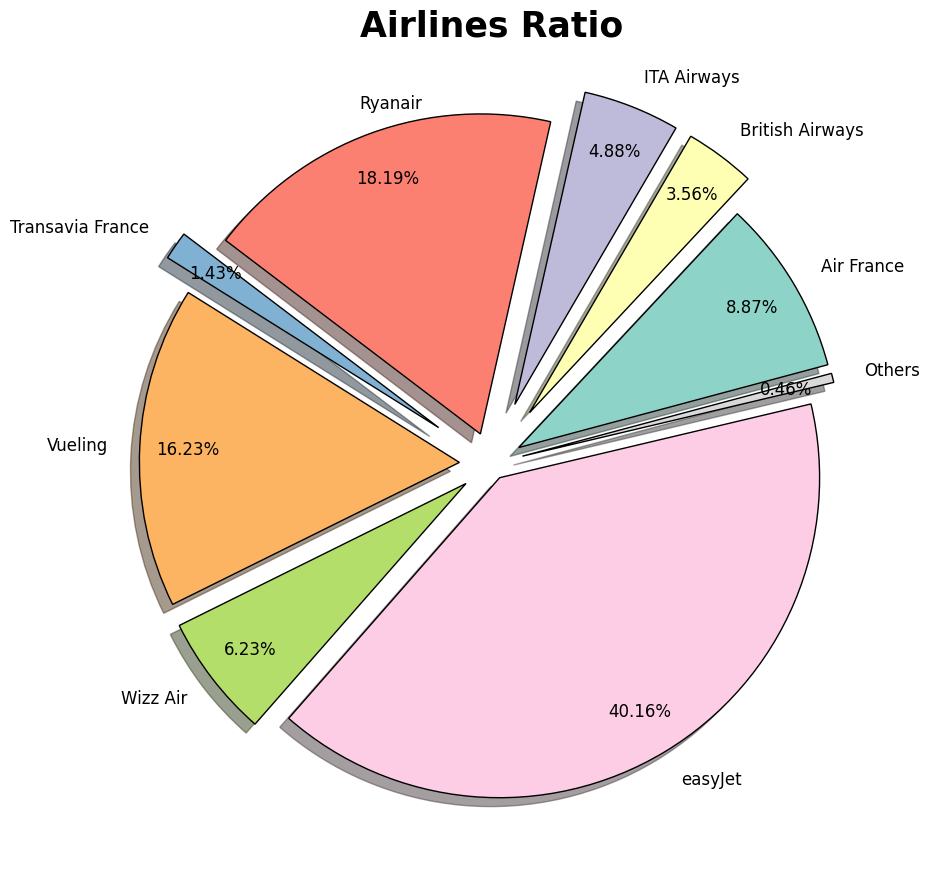

In [3493]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
airlines = grouped['Airline']
count = grouped['Count']
plt.title('Airlines Ratio', fontsize=25, fontweight='bold', pad=20)
ax.pie(count, labels = airlines, autopct='%1.2f%%', shadow=True, startangle=15, explode=(0.1, 0.2, 0.2, 0.1, 0.2, 0.1, 0.1, 0.05, 0.1), textprops={'fontsize': 12}
       , colors = sns.color_palette('Set3', 9), wedgeprops={'edgecolor': 'black'}, pctdistance=0.85, labeldistance=1.1, center=(0.5, 0.5))
plt.show()

In [3494]:
'''now we will look and search for certain factors that can determine different price policies that airlines may have'''

'now we will look and search for certain factors that can determine different price policies that airlines may have'

In [3495]:
# checking the correlation between the features and the price:
corr_test_df = df_filtered.copy()
corr_test_df.drop('Airline', axis=1, inplace=True)
correlation = corr_test_df.corr()
print(correlation['Price(NIS)'])

Price(NIS)                                1.000000
TTT                                      -0.272479
LOS                                      -0.011752
Checked Bags                              0.050665
Carry-ons                                 0.431884
Onward Flight Connections                 0.057282
Return Flight Connections                 0.072941
Total Onward Flight Duration(min)         0.311412
Total Return Flight Duration(min)         0.310861
Departure Time Category_Evening           0.051766
Departure Time Category_Morning          -0.005799
Departure Time Category_Night            -0.025292
Departure Time Category_Noon             -0.034460
Arrival Time Category_Evening             0.078081
Arrival Time Category_Morning            -0.040589
Arrival Time Category_Night              -0.010810
Arrival Time Category_Noon               -0.050519
Return Departure Time Category_Evening    0.021347
Return Departure Time Category_Morning   -0.001908
Return Departure Time Category_

In [3496]:
'''features to keep an eye on:
- Total Onward Flight Duration(min)
- Total Return Flight Duration(min)
- TTT
- Carry-ons'''

'features to keep an eye on:\n- Total Onward Flight Duration(min)\n- Total Return Flight Duration(min)\n- TTT\n- Carry-ons'

c:\Users\galha\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\galha\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\galha\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\galha\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\galha\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\galha\AppData\Local\Programs\Python\Python313\Lib\site-p

<Figure size 1200x800 with 0 Axes>

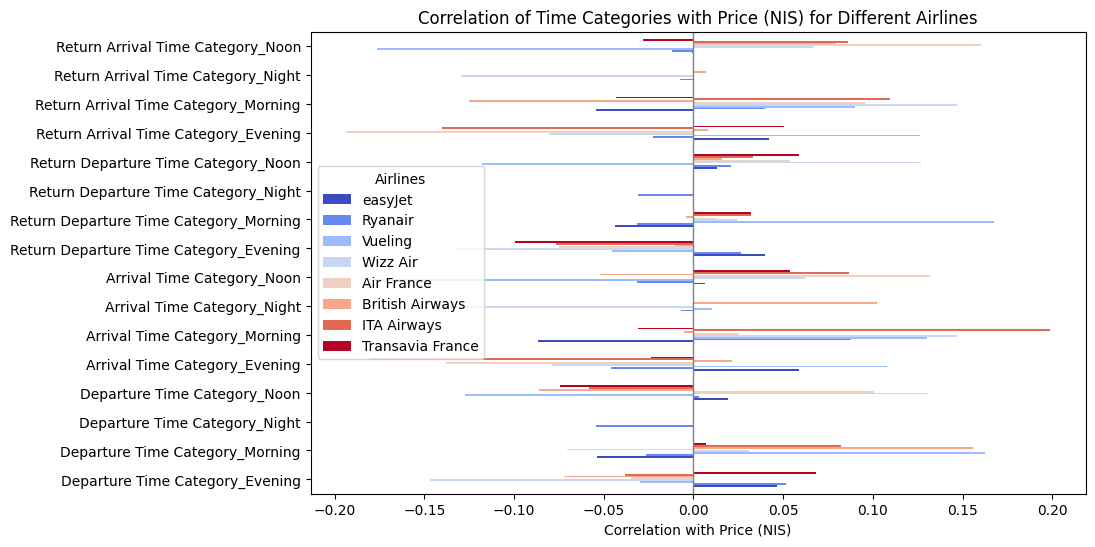

In [3497]:
# checking specificaly if the time categories have any correlation with the price
time_category_feats = [
    'Departure Time Category_Evening', 'Departure Time Category_Morning', 'Departure Time Category_Night',
    'Departure Time Category_Noon', 'Arrival Time Category_Evening', 'Arrival Time Category_Morning',
    'Arrival Time Category_Night', 'Arrival Time Category_Noon', 'Return Departure Time Category_Evening',
    'Return Departure Time Category_Morning', 'Return Departure Time Category_Night', 'Return Departure Time Category_Noon',
    'Return Arrival Time Category_Evening', 'Return Arrival Time Category_Morning', 'Return Arrival Time Category_Night',
    'Return Arrival Time Category_Noon'
]

# Function to calculate correlation for a specific airline with specific features
def calculate_correlation(airline, features):
    df_airline = corr_test_df[df_filtered['Airline'] == airline]
    return df_airline[features].corrwith(df_airline['Price(NIS)'])

# Calculate the correlations for each airline and store them
airlines = ['easyJet', 'Ryanair', 'Vueling', 'Wizz Air', 'Air France', 'British Airways', 'ITA Airways', 'Transavia France']
correlations_dict = {}

for airline in airlines:
    correlations_dict[airline] = calculate_correlation(airline, time_category_feats)

# Convert the dictionary into a DataFrame for easy visualization
correlation_df = pd.DataFrame(correlations_dict)

# Plot the correlations for each feature
plt.figure(figsize=(12, 8))
correlation_df.plot(kind='barh', figsize=(10, 6), cmap='coolwarm')
plt.xlabel('Correlation with Price (NIS)')
plt.title('Correlation of Time Categories with Price (NIS) for Different Airlines')
plt.axvline(0, color='gray', linewidth=1)  # Highlight 0 correlation line
plt.legend(title='Airlines')
plt.show()

In [3498]:
'''the corr for these features are very low (|corr| = 0.2 at max), so the pricing policy isn't too affected by the times of the flights'''

"the corr for these features are very low (|corr| = 0.2 at max), so the pricing policy isn't too affected by the times of the flights"

In [3499]:
# Drop all columns that were created by one-hot encoding
corr_test_df = corr_test_df.loc[:, ~corr_test_df.columns.str.startswith('Departure Time') & 
                                         ~corr_test_df.columns.str.startswith('Arrival Time') & 
                                         ~corr_test_df.columns.str.startswith('Return Departure Time') &
                                         ~corr_test_df.columns.str.startswith('Return Arrival Time')]
df_filtered = df_filtered.loc[:, ~df_filtered.columns.str.startswith('Departure Time') & 
                                         ~df_filtered.columns.str.startswith('Arrival Time') & 
                                         ~df_filtered.columns.str.startswith('Return Departure Time') &
                                         ~df_filtered.columns.str.startswith('Return Arrival Time')]
correlation = correlation.loc[:, ~correlation.columns.str.startswith('Departure Time') & 
                                         ~correlation.columns.str.startswith('Arrival Time') & 
                                         ~correlation.columns.str.startswith('Return Departure Time') &
                                         ~correlation.columns.str.startswith('Return Arrival Time')]

df_filtered

,Price(NIS),Airline,TTT,LOS,Checked Bags,Carry-ons,Onward Flight Connections,Return Flight Connections,Total Onward Flight Duration(min),Total Return Flight Duration(min)
0,1332,Air France,1,1,0,1,0,0,125,135
1,1247,Transavia France,1,1,0,1,0,1,125,945
2,1332,Air France,1,1,0,1,0,0,125,135
3,1332,Air France,1,1,0,1,0,0,125,135
4,1332,Air France,1,1,0,1,0,0,125,135
...,...,...,...,...,...,...,...,...,...,...
179453,363,Wizz Air,5,3,0,0,0,0,150,175
179458,528,easyJet,5,3,0,0,0,0,150,165
179460,559,easyJet,5,3,0,0,0,0,150,165
179476,573,easyJet,5,3,0,0,0,0,150,160


In [3500]:
#checking the correlation between the features and the price for each airline to decide pricing policies:
easyJet = corr_test_df[df_filtered['Airline'] == 'easyJet']
ryanair = corr_test_df[df_filtered['Airline'] == 'Ryanair']
vueling = corr_test_df[df_filtered['Airline'] == 'Vueling']
wizzAir = corr_test_df[df_filtered['Airline'] == 'Wizz Air']
airFrance = corr_test_df[df_filtered['Airline'] == 'Air France']
britishAirways = corr_test_df[df_filtered['Airline'] == 'British Airways']
itaAirways = corr_test_df[df_filtered['Airline'] == 'ITA Airways']
transavia = corr_test_df[df_filtered['Airline'] == 'Transavia France']
easyJet

C:\Users\galha\AppData\Roaming\Python\Python313\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Price(NIS),TTT,LOS,Checked Bags,Carry-ons,Onward Flight Connections,Return Flight Connections,Total Onward Flight Duration(min),Total Return Flight Duration(min)
195,1051,1,3,0,0,0,0,120,130
196,1051,1,3,0,0,0,0,120,130
197,1117,1,3,0,0,0,0,120,130
198,1117,1,3,1,0,0,0,120,130
199,1051,1,3,0,0,0,0,120,130
...,...,...,...,...,...,...,...,...,...
179368,446,4,4,0,0,0,0,80,75
179458,528,5,3,0,0,0,0,150,165
179460,559,5,3,0,0,0,0,150,165
179476,573,5,3,0,0,0,0,150,160


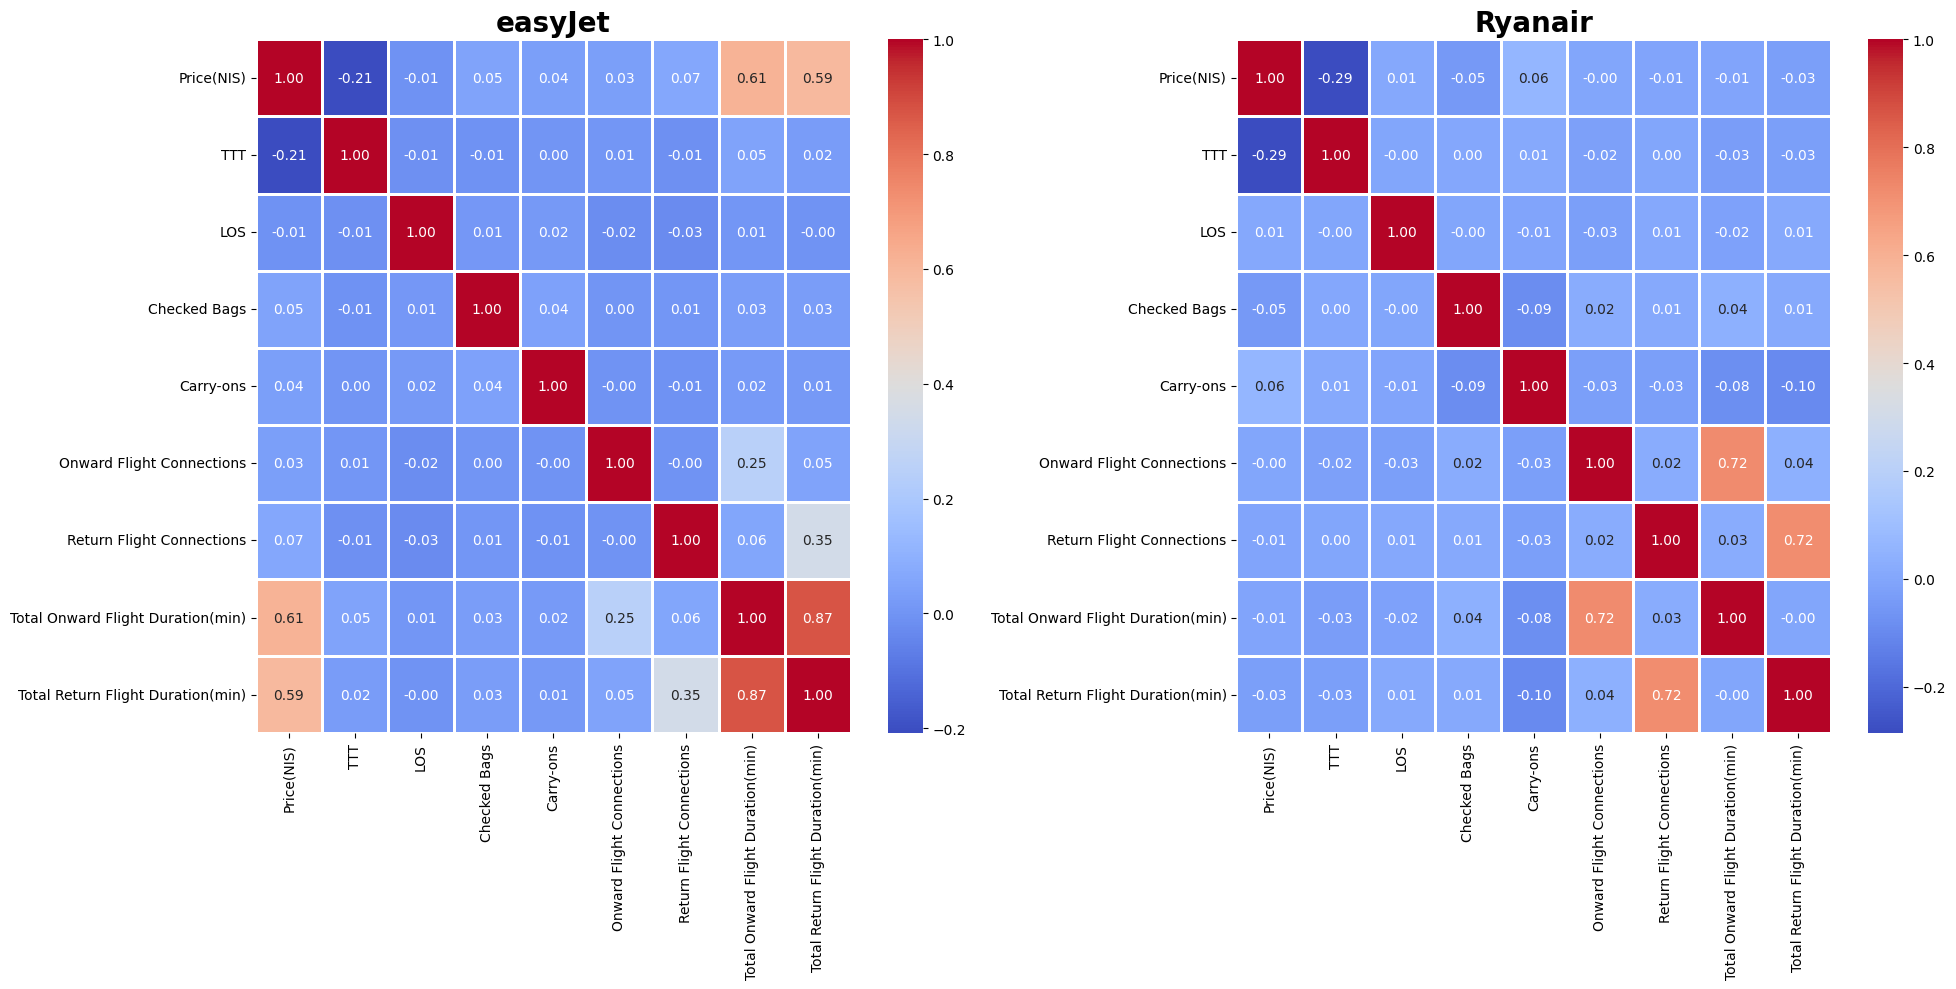

In [3501]:
fix, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(easyJet.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[0])
axes[0].set_title('easyJet', fontsize=20, fontweight='bold')
sns.heatmap(ryanair.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[1])
axes[1].set_title('Ryanair', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

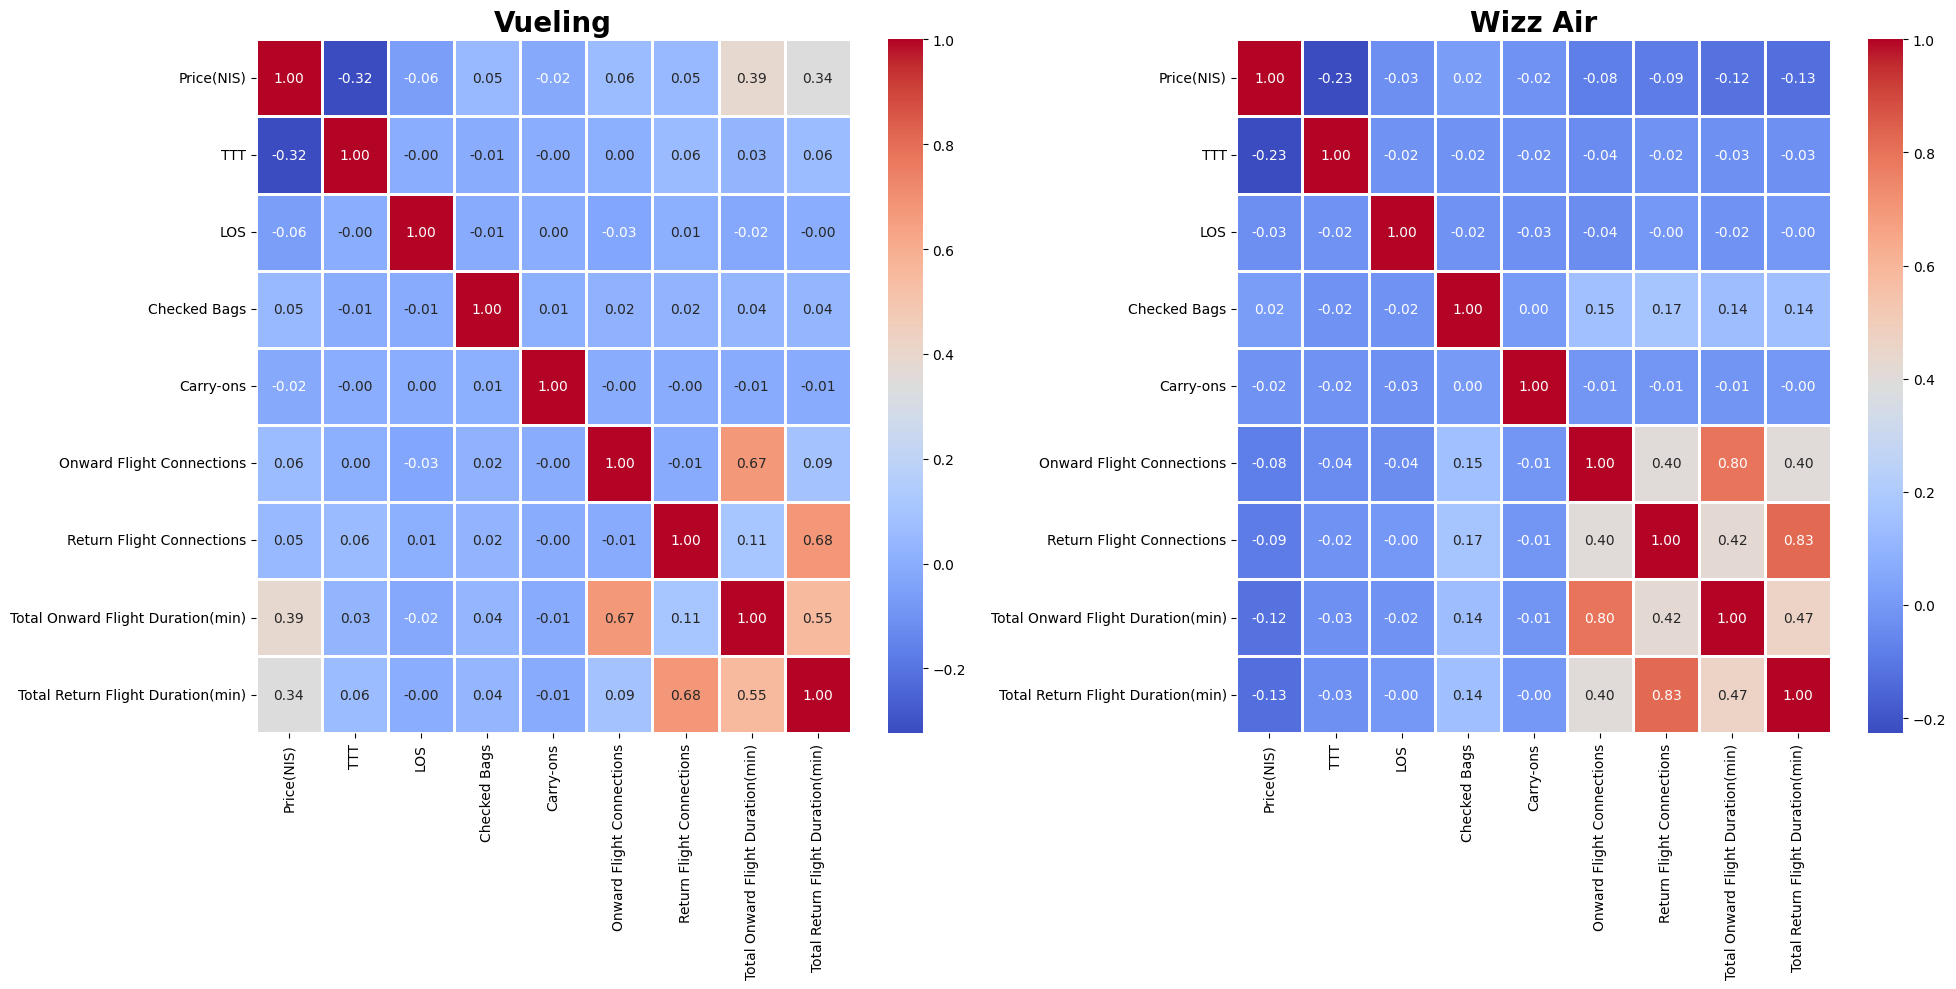

In [3502]:
fix, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(vueling.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[0])
axes[0].set_title('Vueling', fontsize=20, fontweight='bold')
sns.heatmap(wizzAir.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[1])
axes[1].set_title('Wizz Air', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

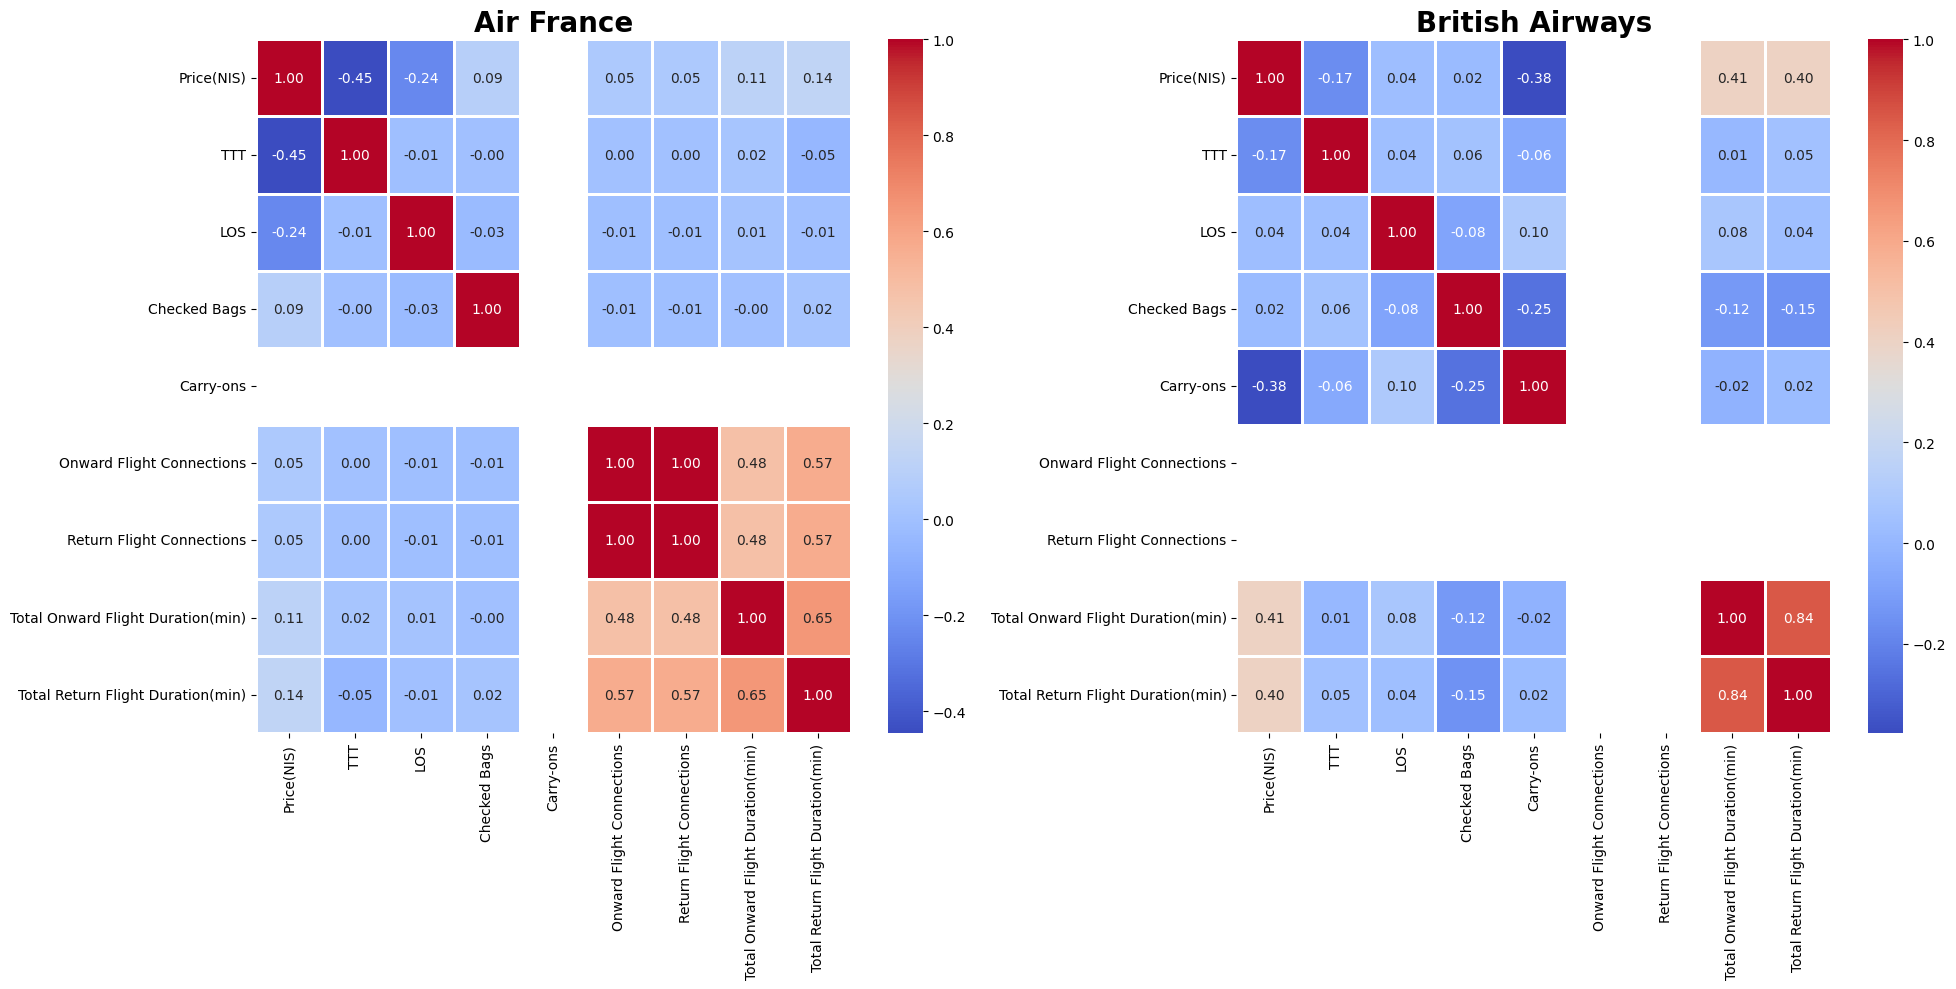

In [3503]:
fix, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(airFrance.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[0])
axes[0].set_title('Air France', fontsize=20, fontweight='bold')
sns.heatmap(britishAirways.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[1])
axes[1].set_title('British Airways', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

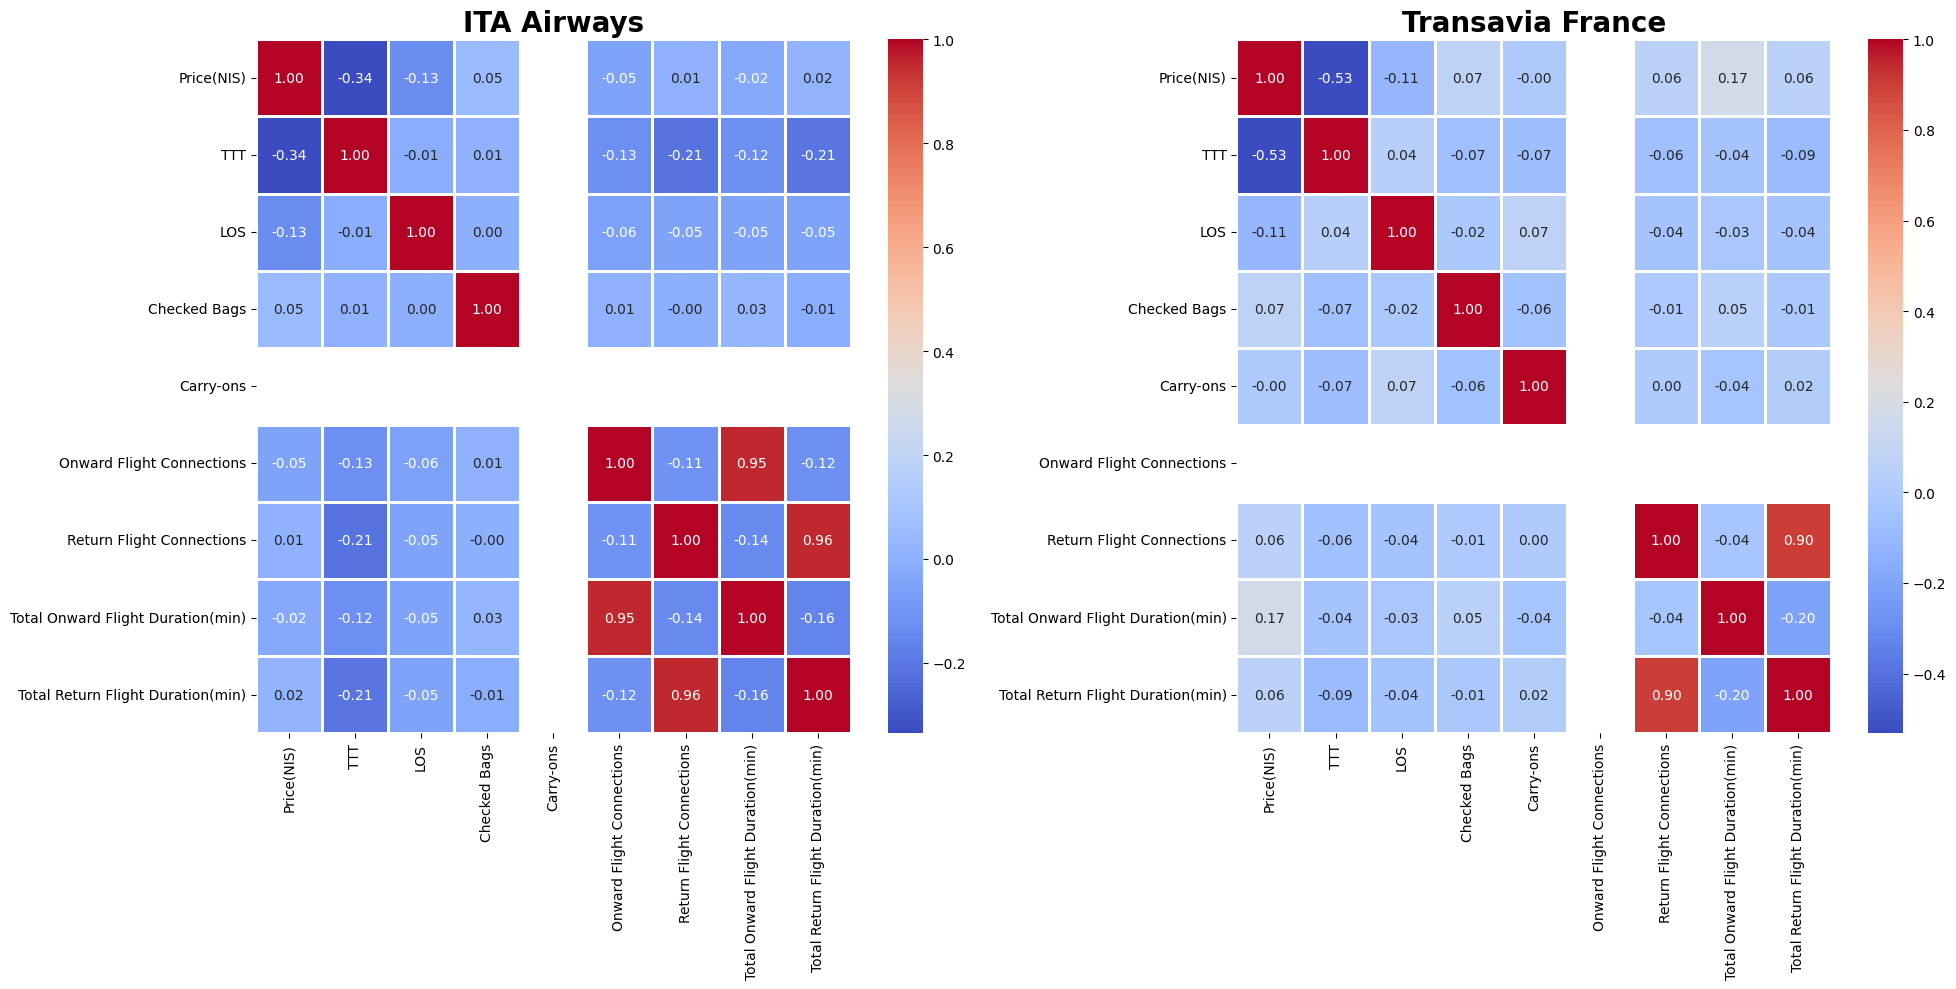

In [3504]:
fix, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(itaAirways.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[0])
axes[0].set_title('ITA Airways', fontsize=20, fontweight='bold')
sns.heatmap(transavia.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[1])
axes[1].set_title('Transavia France', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

In [3505]:
'''Metrics to consider following correlation check:
- Total Onward Flight Duration
- Total Return Flight Duration
- TTT
- LOS
- Carry-ons'''

'Metrics to consider following correlation check:\n- Total Onward Flight Duration\n- Total Return Flight Duration\n- TTT\n- LOS\n- Carry-ons'

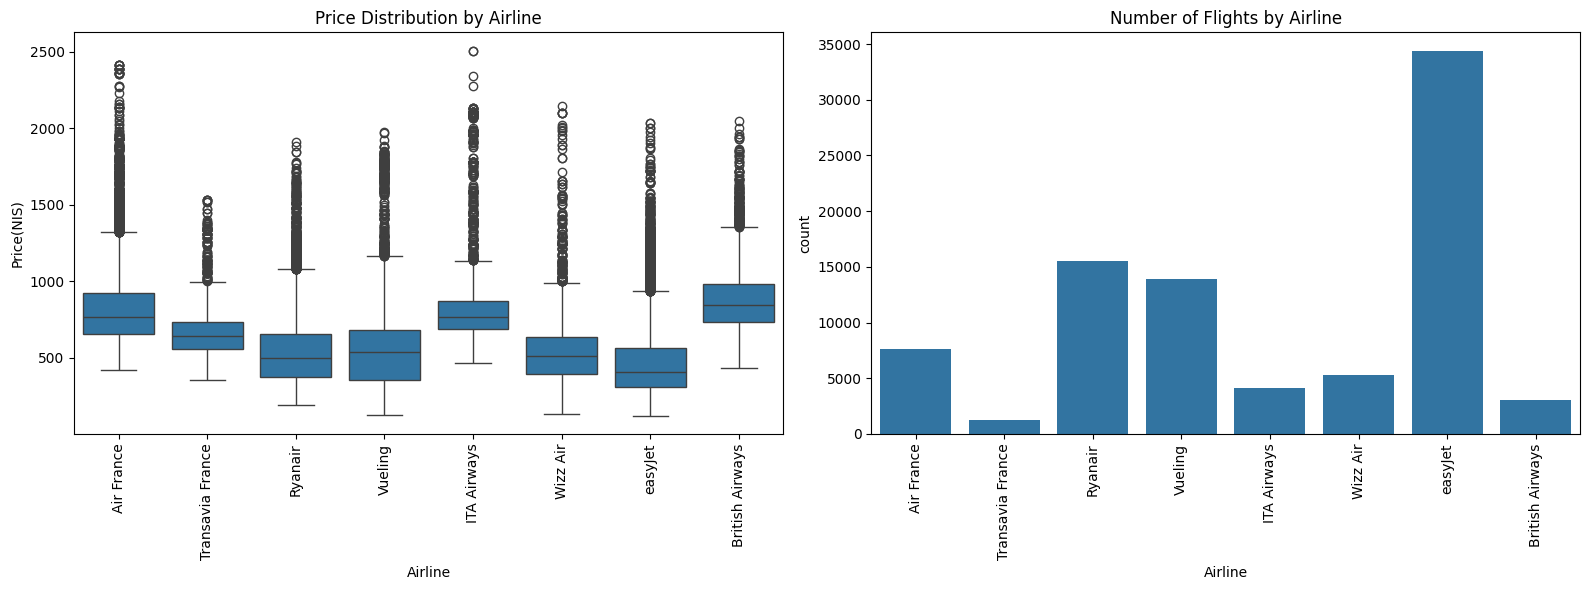

In [3506]:
# checking the distribution of the price by airline and the number of flights by airline
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot price distribution by airline (box plot)
sns.boxplot(data=df_filtered, x='Airline', y='Price(NIS)', ax=axes[0])
axes[0].set_title('Price Distribution by Airline')
axes[0].tick_params(axis='x', rotation=90)  # Rotate airline names for better visibility

# Plot number of flights by airline (count plot)
sns.countplot(data=df_filtered, x='Airline', ax=axes[1])
axes[1].set_title('Number of Flights by Airline')
axes[1].tick_params(axis='x', rotation=90)  # Rotate airline names for better visibility

plt.tight_layout()
plt.show()

In [3507]:
'''a pricing policy could be the more flights an airline has, the lower the price for each flight'''
# Transavia France is an exception due to the low number of flights - can be considered as an outlier

'a pricing policy could be the more flights an airline has, the lower the price for each flight'

In [3508]:
'''also check:
avg price per airline
price variance/std-v per each airline
'''

'also check:\navg price per airline\nprice variance/std-v per each airline\n'

In [3509]:
# These are the main features that we beleive dictate the pricing policy of different airlines:
df_cluster = df_filtered.groupby('Airline').agg(
    avgOnwardFlightDurationMin = ('Total Onward Flight Duration(min)', 'mean'),
    avgReturnFlightDurationMin= ('Total Return Flight Duration(min)', 'mean'),
    avgTTT = ('TTT', 'mean'),
    avgLOS = ('LOS', 'mean'),
    avgCarryOns = ('Carry-ons', 'mean'),
    avgPrice = ('Price(NIS)', 'mean'),
    priceStd = ('Price(NIS)', 'std'),
    flightsCount = ('Price(NIS)', 'count')
)
df_cluster

,avgOnwardFlightDurationMin,avgReturnFlightDurationMin,avgTTT,avgLOS,avgCarryOns,avgPrice,priceStd,flightsCount
Airline,,,,,,,,
Air France,127.404429,127.914579,12.675191,3.409175,1.000000,851.589639,298.167013,7586
British Airways,149.017740,148.134034,12.190210,3.036465,0.682983,891.395204,241.510035,3044
ITA Airways,139.648597,142.018470,14.757976,2.899976,1.000000,837.912449,280.988850,4169
Ryanair,154.703897,155.003472,15.632330,3.000900,0.112269,543.843107,230.131833,15552
Transavia France,129.775510,130.302041,16.607347,3.014694,0.985306,690.466939,210.518545,1225
Vueling,114.754955,115.230631,15.583712,2.956252,0.001514,552.671495,251.353568,13875
Wizz Air,160.911737,160.929577,16.126573,3.032488,0.004883,542.656901,214.822835,5325
easyJet,89.897641,89.753203,14.730693,2.979441,0.015084,455.070443,196.201744,34340


In [3510]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.313877
avgReturnFlightDurationMin    0.322174
avgTTT                       -0.678902
avgLOS                        0.383570
avgCarryOns                   0.866385
avgPrice                      1.000000
priceStd                      0.706924
flightsCount                 -0.691933
Name: avgPrice, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'avgOnwardFlightDurationMin'),
  Text(1, 0, 'avgReturnFlightDurationMin'),
  Text(2, 0, 'avgTTT'),
  Text(3, 0, 'avgLOS'),
  Text(4, 0, 'avgCarryOns'),
  Text(5, 0, 'avgPrice'),
  Text(6, 0, 'priceStd'),
  Text(7, 0, 'flightsCount')])

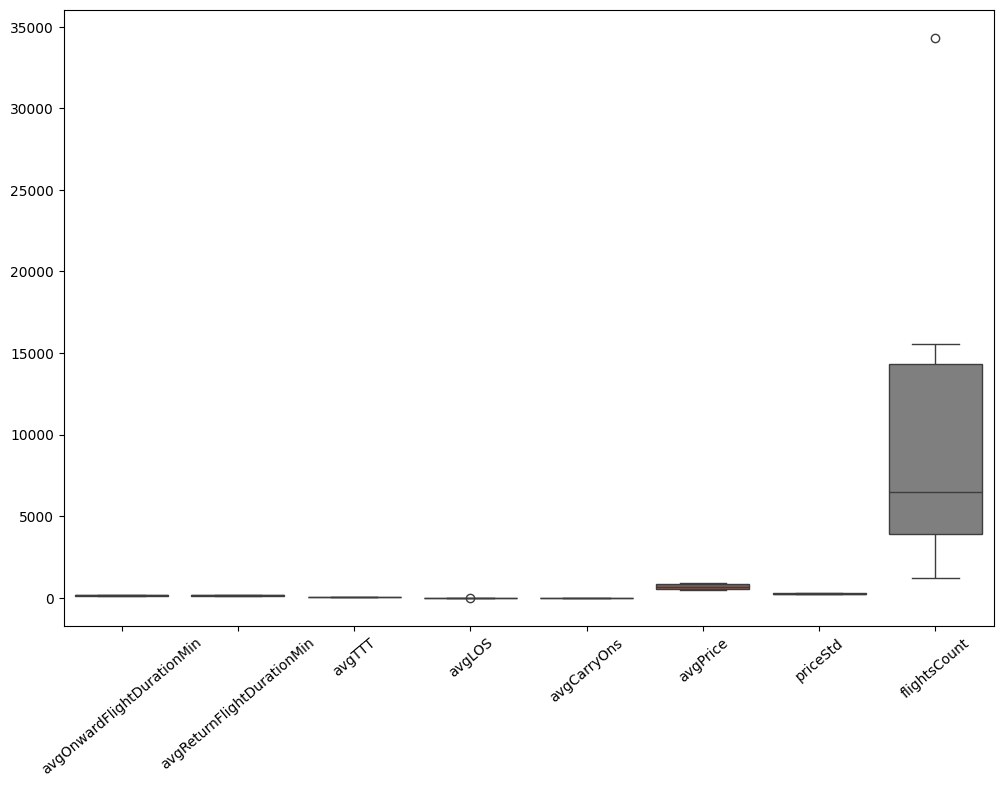

In [3511]:
# checking for outliers
plt.figure(figsize=(12,8))
sns.boxplot(df_cluster)
plt.xticks(rotation=40)

([0], [Text(0, 0, '')])

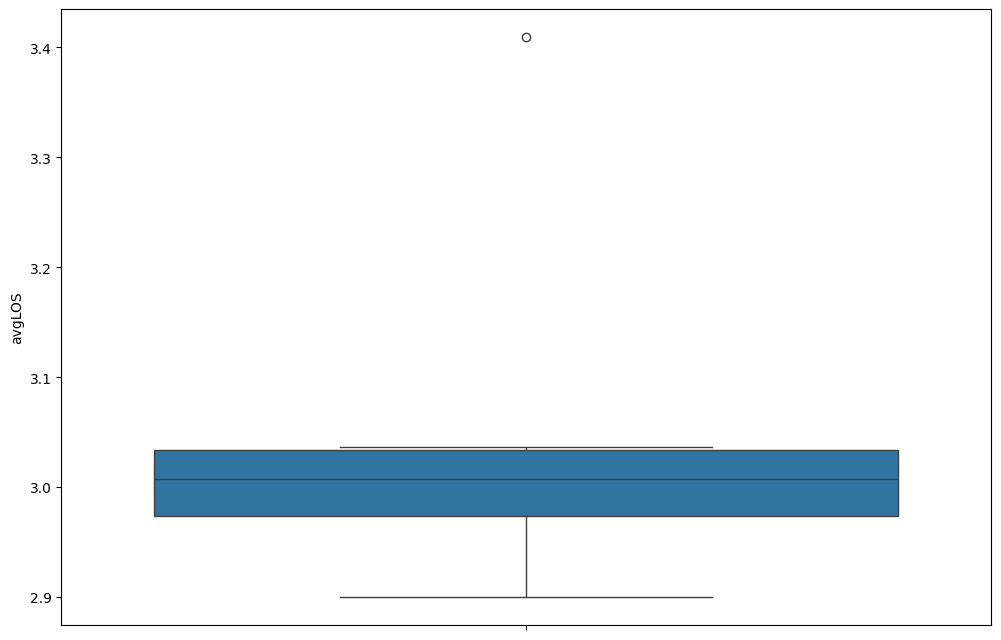

In [3512]:
plt.figure(figsize=(12,8))
sns.boxplot(df_cluster['avgLOS'])
plt.xticks(rotation=40)

([0], [Text(0, 0, '')])

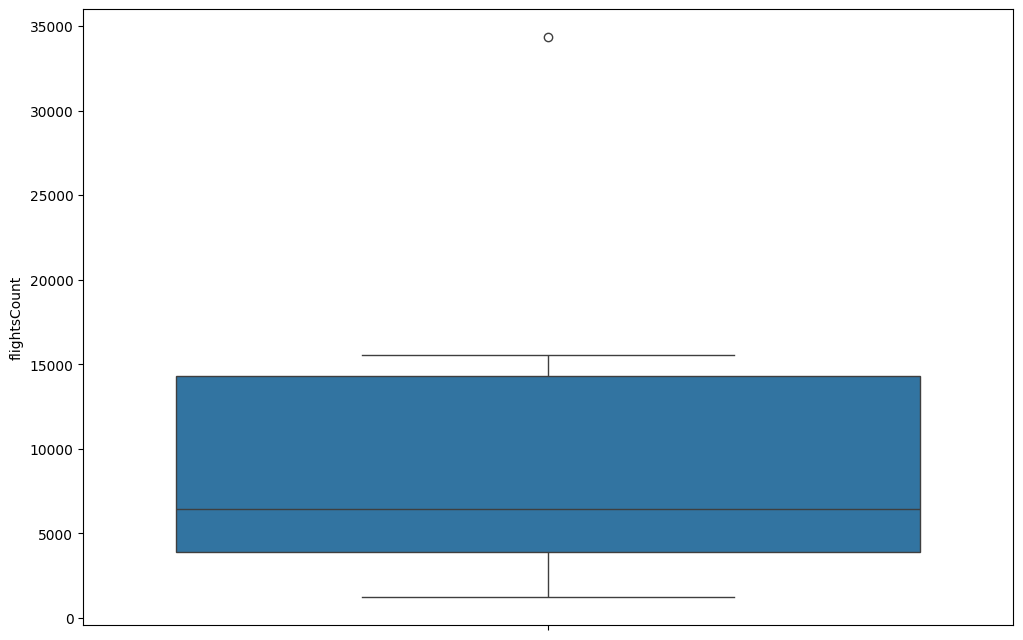

In [3513]:
plt.figure(figsize=(12,8))
sns.boxplot(df_cluster['flightsCount'])
plt.xticks(rotation=40)

In [3514]:
outliers = []
for feature in df_cluster.columns:
    Q1 = np.percentile(df_cluster[feature],25)
    Q3 = np.percentile(df_cluster[feature],75)
    step = (Q3-Q1)*1.5
    outliers_pts = df_cluster[~((df_cluster[feature]>=Q1-step) & (df_cluster[feature]<=Q3+step))]
    outliers.extend(outliers_pts.index)

    print('Airlines considered outliers for the feature %s are:' %feature)
    print(outliers_pts.index)
    print()

Airlines considered outliers for the feature avgOnwardFlightDurationMin are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature avgReturnFlightDurationMin are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature avgTTT are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature avgLOS are:
Index(['Air France'], dtype='object', name='Airline')

Airlines considered outliers for the feature avgCarryOns are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature avgPrice are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature priceStd are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature flightsCount are:
Index(['easyJet'], dtype='object', name='Airline')



In [3515]:
'''there is a clear indication that Air France and easyJet may have a different pricing policy for avg LOS and total number of flights, we will look into this later'''
# we will only remove outliers that are outliers in at least 2 different features, so in our case there is non to remove

'there is a clear indication that Air France and easyJet may have a different pricing policy for avg LOS and total number of flights, we will look into this later'

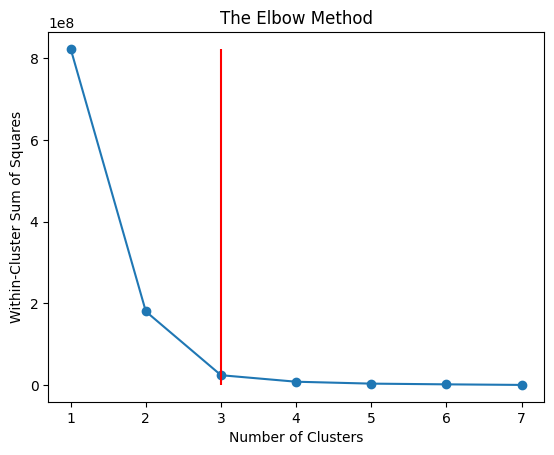

In [3516]:
# checking the elbow method to determine the best number of k's for clustering
wcss1 = []
for i in range(1,8):
    kmeans1 = KMeans(n_clusters=i, n_init=10).fit(df_cluster)
    wcss1.append(kmeans1.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss1,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss1,marker='o')
plt.vlines(k_elbow,np.min(wcss1),np.max(wcss1),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

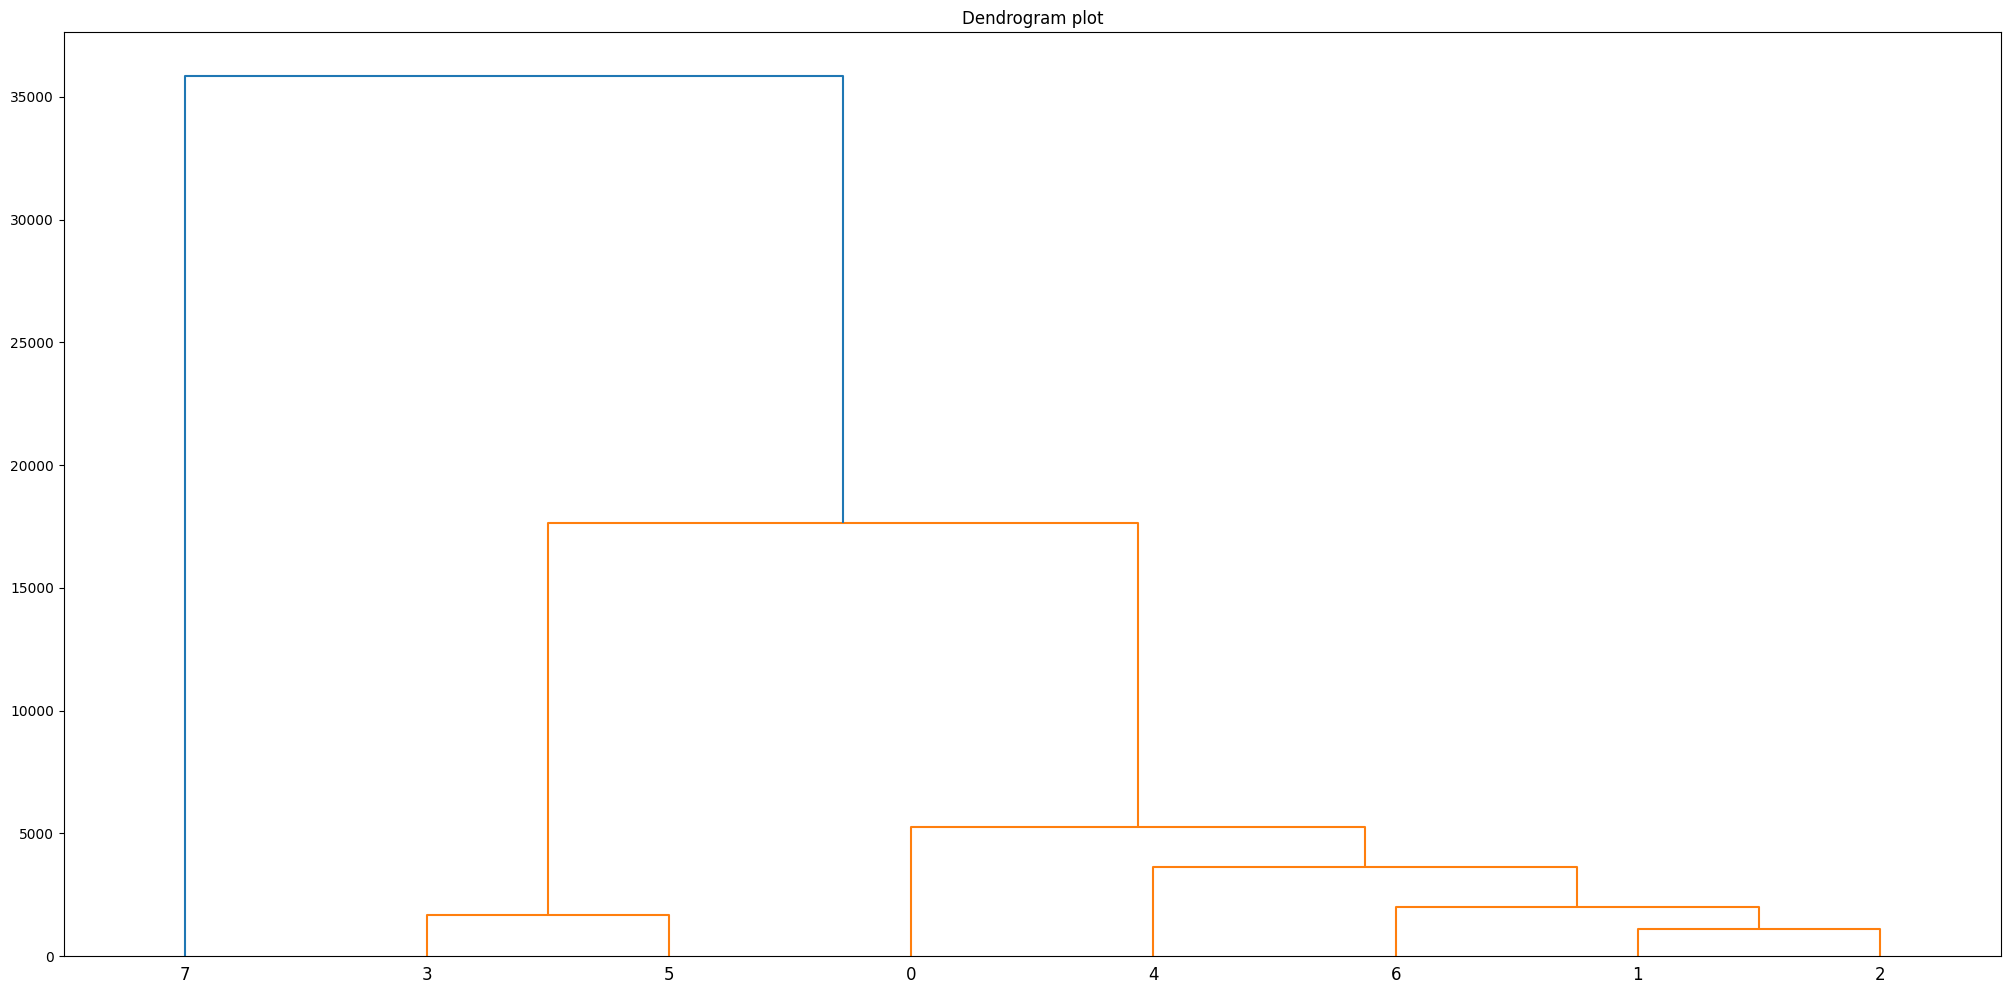

In [3517]:
# checking the dendrogram to see how the clusters merge (rule of thumb - go to the longest branch from the top and go up a bit until there is a clear slice of the tree)
plt.figure(figsize=(25,12))
dendrogram1=sch.dendrogram(sch.linkage(df_cluster,method = 'ward'))
plt.title('Dendrogram plot')
plt.show()

In [3518]:
# checking silhouette score to see how well seperated the clusters are from each other and also how similar points, within a cluster, are
for i in range(2,8):
    X1 = df_cluster.values
    kmeans1 = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans1 = kmeans1.fit_predict(X1)
    print(f'{i} clusters silhouette score is {silhouette_score(X1,y_kmeans1)}')

2 clusters silhouette score is 0.6461323164177484
3 clusters silhouette score is 0.6416097972901247
4 clusters silhouette score is 0.4181532445729235
5 clusters silhouette score is 0.35401330874467163
6 clusters silhouette score is 0.2455516032722087
7 clusters silhouette score is 0.05517829787341119


In [3519]:
# clustering
X1 = df_cluster.values
labels = df_cluster.index

num_of_clusters = 3

kmeans = KMeans(n_clusters=num_of_clusters, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X1)

# dimension reduction
pca = PCA(n_components=2)
X1 = pca.fit_transform(X1)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.99858077e-01, 1.32825202e-04])

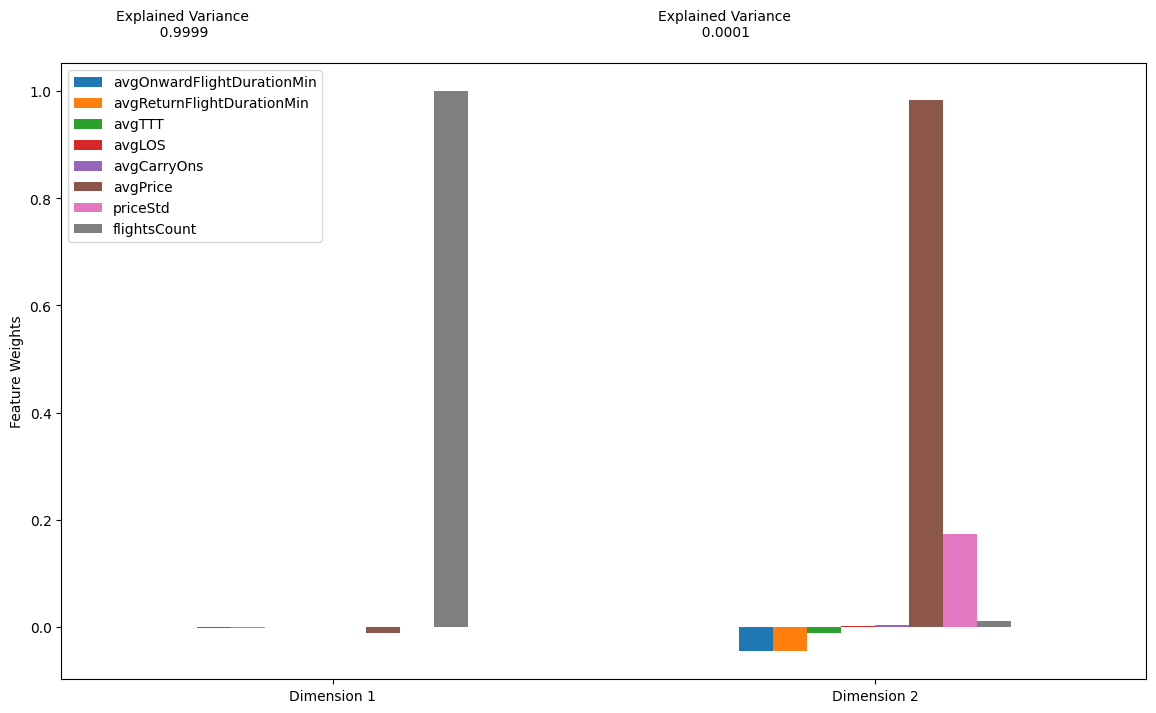

In [3520]:
# seeing the weight of each feature in each dimension
pca_results = vs.pca_results(df_cluster,pca)

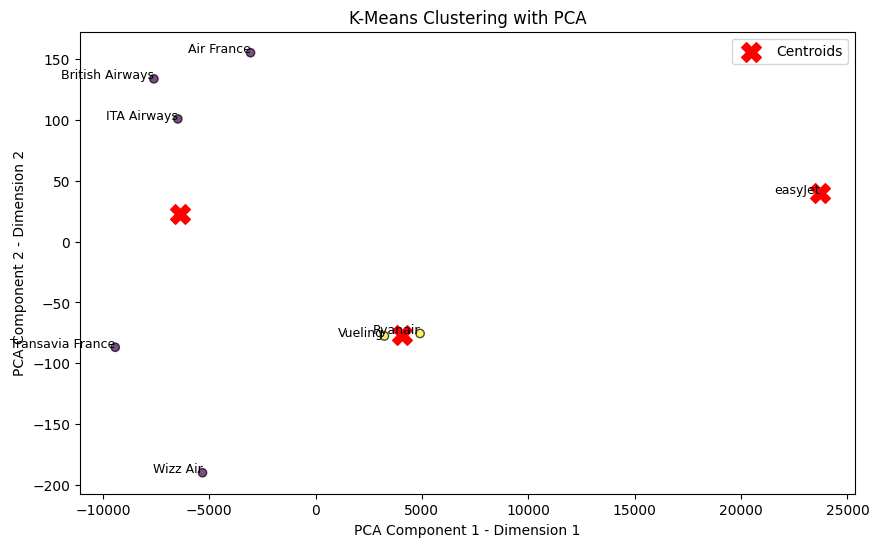

In [3521]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X1[:, 0], X1[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', alpha=0.7)

# Plot centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')

# Add labels to each data point
for i, txt in enumerate(labels):
    ax.text(X1[i, 0], X1[i, 1], txt, fontsize=9, ha='right', color='black')

# Labels and title
ax.set_title("K-Means Clustering with PCA")
ax.set_xlabel("PCA Component 1 - Dimension 1")
ax.set_ylabel("PCA Component 2 - Dimension 2")
ax.legend()

plt.show()

In [3522]:
'''should probably scale the data so that the features have the same weight'''

'should probably scale the data so that the features have the same weight'

In [3523]:
# scaling the data to Z (mean = 0, std = 1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)
print(df_scaled)

[[-0.26948263 -0.26399064 -1.42185472  2.53338543  1.15783402  1.13641712
   1.74867498 -0.30122247]
 [ 0.72446396  0.66493165 -1.74823119 -0.03241594  0.45834569  1.3864918
   0.03176518 -0.74928287]
 [ 0.29359856  0.38397036 -0.02020816 -0.97203238  1.15783402  1.05049147
   1.228115   -0.63830357]
 [ 0.98595728  0.98052741  0.5682043  -0.27725173 -0.80091786 -0.79697123
  -0.31303515  0.48460958]
 [-0.16044205 -0.15430588  1.22435901 -0.18229356  1.12541243  0.12417906
  -0.90738818 -0.92872405]
 [-0.85120294 -0.84671668  0.5354856  -0.58461643 -1.04529533 -0.74150772
   0.33005958  0.31917645]
 [ 1.27144162  1.25278457  0.90081354 -0.05979375 -1.03786148 -0.80442345
  -0.77695275 -0.52426618]
 [-1.9943338  -2.01720078 -0.03856838 -0.42498163 -1.01535148 -1.35467706
  -1.34123866  2.33801311]]


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7')])

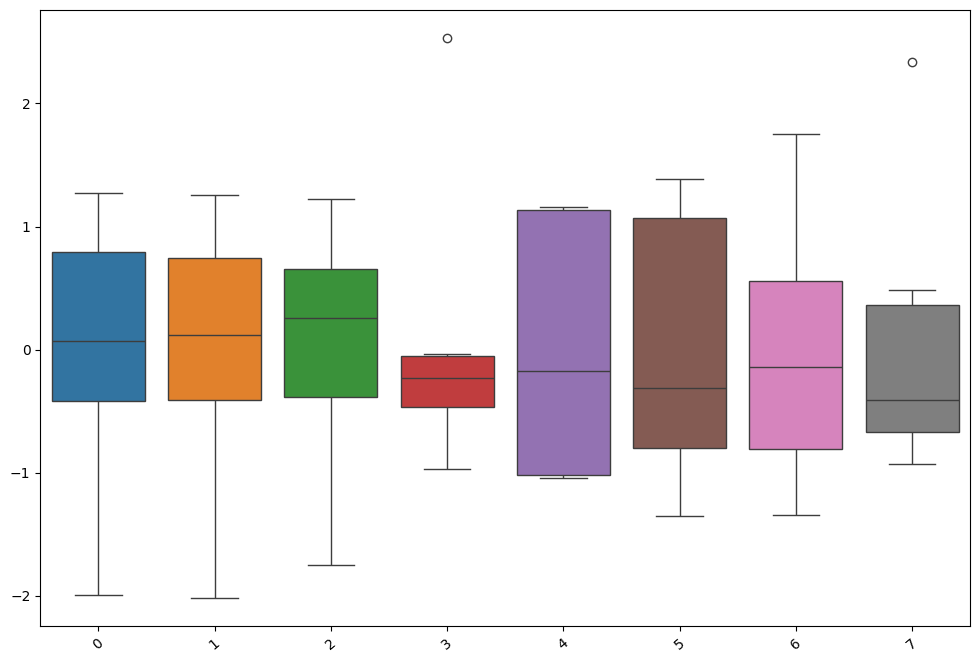

In [3524]:
plt.figure(figsize=(12,8))
sns.boxplot(df_scaled)
plt.xticks(rotation=40)

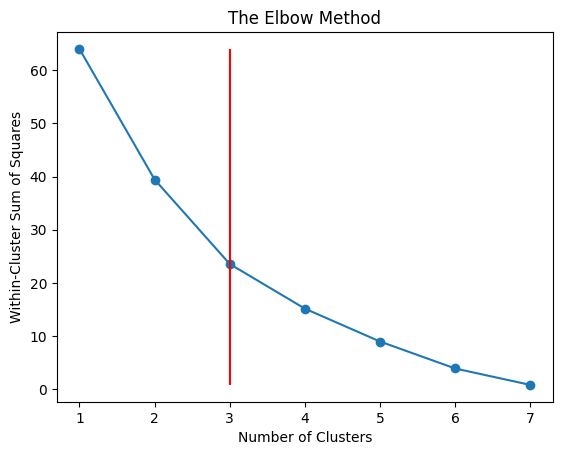

In [3525]:
wcss2 = []
for i in range(1,8):
    kmeans2 = KMeans(n_clusters=i, n_init=10).fit(df_scaled)
    wcss2.append(kmeans2.inertia_)

k_elbow = KneeLocator(x = range(1,8),y=wcss2,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss2,marker='o')
plt.vlines(k_elbow,np.min(wcss2),np.max(wcss2),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

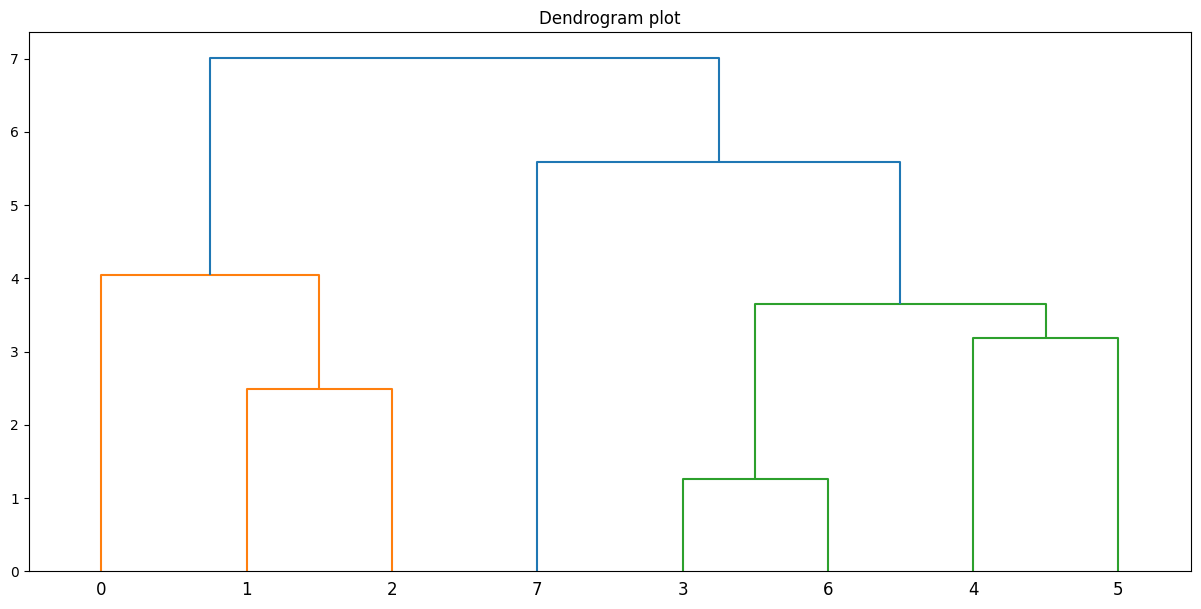

In [3526]:
plt.figure(figsize=(15,7))
dendrogram2=sch.dendrogram(sch.linkage(df_scaled,method = 'ward'))
plt.title('Dendrogram plot')
plt.show()

In [3527]:
for i in range(2, 8):
    kmeans2 = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans2 = kmeans2.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, y_kmeans2)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.13482480169552652
3 clusters silhouette score is 0.19218414297214476
4 clusters silhouette score is 0.23315430154976327
5 clusters silhouette score is 0.241700131078077
6 clusters silhouette score is 0.1936104534479305
7 clusters silhouette score is 0.1411159588718337


In [3528]:
# clustering
X2 = df_scaled
labels = df_cluster.index

num_of_clusters = 4

kmeans = KMeans(n_clusters=num_of_clusters, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X2)

# dimension reduction
pca = PCA(n_components=2)
X2 = pca.fit_transform(X2)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.48653522, 0.27765416])

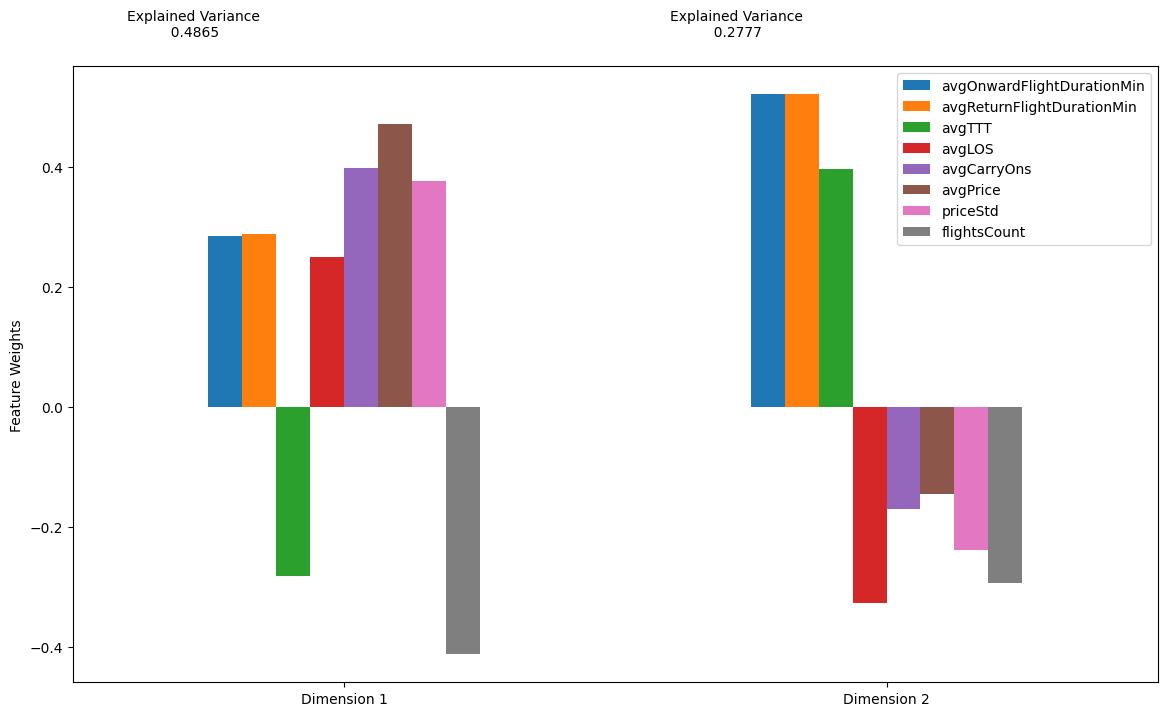

In [3529]:
df_scaled_df = pd.DataFrame(df_scaled, columns=df_cluster.columns)
pca_results = vs.pca_results(df_scaled_df,pca)

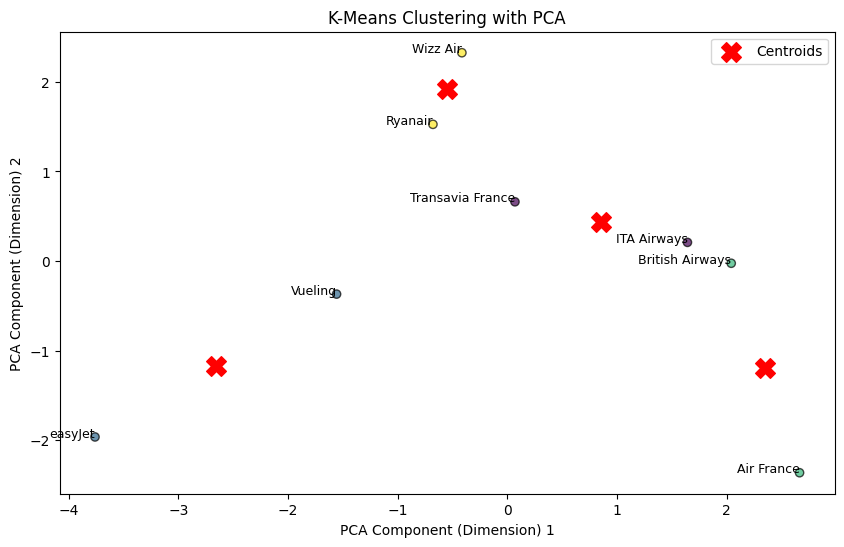

In [3530]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X2[:, 0], X2[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', alpha=0.7)

# Plot centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')

# Add labels to each data point
for i, txt in enumerate(labels):
    ax.text(X2[i, 0], X2[i, 1], txt, fontsize=9, ha='right', color='black')

# Labels and title
ax.set_title("K-Means Clustering with PCA")
ax.set_xlabel("PCA Component (Dimension) 1")
ax.set_ylabel("PCA Component (Dimension) 2")
ax.legend()

plt.show()

In [3531]:
''' It is difficult to understand the relationships due to the dimension reduction, so we will break it down into different categories to try to understand them.
Because the weight of flights count is very low in the pca, we will look at it individually first'''

' It is difficult to understand the relationships due to the dimension reduction, so we will break it down into different categories to try to understand them.\nBecause the weight of flights count is very low in the pca, we will look at it individually first'

In [3532]:
df_cluster.iloc[:, [5,7]]

,avgPrice,flightsCount
Airline,,
Air France,851.589639,7586
British Airways,891.395204,3044
ITA Airways,837.912449,4169
Ryanair,543.843107,15552
Transavia France,690.466939,1225
Vueling,552.671495,13875
Wizz Air,542.656901,5325
easyJet,455.070443,34340


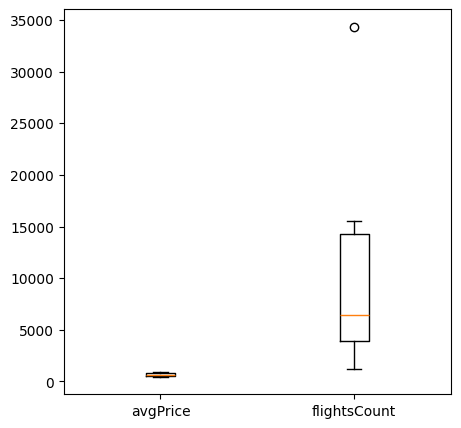

In [3533]:
# taking only the neccessary columns and checking if scaling is needed
flight_count_data = df_cluster.iloc[:, [5,7]]
plt.figure(figsize=(5,5))
display_data = [flight_count_data['avgPrice'],flight_count_data['flightsCount']]
plt.boxplot(display_data)
plt.xticks(range(1,3),flight_count_data.keys())
plt.show()

In [3534]:
# we scale because the features are in different scales from one another
flight_count_data_scaled = scaler.fit_transform(flight_count_data)

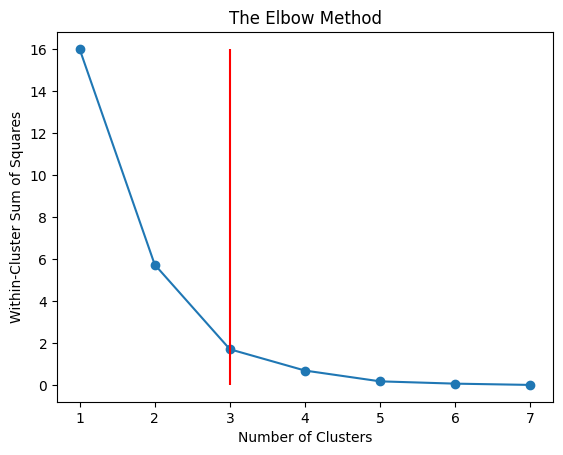

In [3535]:
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(flight_count_data_scaled)
    wcss.append(kmeans.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

In [3536]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(flight_count_data_scaled)
    score = silhouette_score(flight_count_data_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.44026214075328723
3 clusters silhouette score is 0.5218081105426737
4 clusters silhouette score is 0.4168668077290423
5 clusters silhouette score is 0.4447353007551455
6 clusters silhouette score is 0.2449712488447972
7 clusters silhouette score is 0.20259498128336081


In [3537]:
X = flight_count_data_scaled
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X)

# we reverse the scaler (AFTER the clusters have been made) so that visually we can see the correct units
X = scaler.inverse_transform(X)
kmeans.cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_)

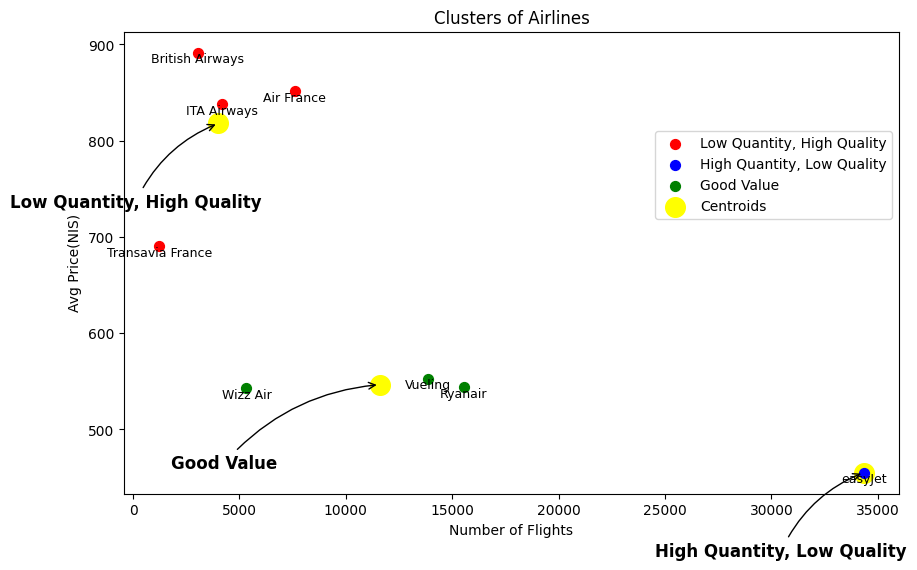

In [3538]:
# scatter plot for the clusters
plt.figure(figsize=(10,6))
label = ['Low Quantity, High Quality', 'High Quantity, Low Quality', 'Good Value']
plt.scatter(X[y_kmeans == 0,1], X[y_kmeans == 0,0], s = 50, c = 'red', label= 'Low Quantity, High Quality',zorder=3)
plt.scatter(X[y_kmeans == 1,1], X[y_kmeans == 1,0], s = 50, c = 'blue', label= 'High Quantity, Low Quality',zorder=3)
plt.scatter(X[y_kmeans == 2,1], X[y_kmeans == 2,0], s = 50, c = 'green', label= 'Good Value',zorder=3)

plt.scatter(kmeans.cluster_centers_[: , 1], kmeans.cluster_centers_[: ,0], s=200, c='yellow', label='Centroids', zorder=1)

plt.title('Clusters of Airlines')
plt.xlabel('Number of Flights')
plt.ylabel('Avg Price(NIS)')

for i, txt in enumerate(flight_count_data.index):
    plt.text(X[i, 1], X[i, 0], txt, fontsize=9, ha='center', va='top', color='black')

for label,x,y in zip(label, kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0]):
    plt.annotate(label, xy=(x,y), xytext=(-150,-50), 
                va='top', fontsize=12, fontweight='bold', textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=-0.2'))

plt.legend(bbox_to_anchor=[1,0.8])
plt.show()

In [3539]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.313877
avgReturnFlightDurationMin    0.322174
avgTTT                       -0.678902
avgLOS                        0.383570
avgCarryOns                   0.866385
avgPrice                      1.000000
priceStd                      0.706924
flightsCount                 -0.691933
Name: avgPrice, dtype: float64

In [3540]:
'''The correlation between the avg price and the number of flights indicates a relatively strong connection.
As seen earlier, easyJet was considered an outlier due to the high number of flights. now we can also see that their avg Price is the lowest, indicating that
their policy could be to offer cheap flights but at a large volume, it is very different to the first cluster policy who we can infer offer higher quality/ more luxerious
flights due to their price being higher and lower volumes of flights'''

'The correlation between the avg price and the number of flights indicates a relatively strong connection.\nAs seen earlier, easyJet was considered an outlier due to the high number of flights. now we can also see that their avg Price is the lowest, indicating that\ntheir policy could be to offer cheap flights but at a large volume, it is very different to the first cluster policy who we can infer offer higher quality/ more luxerious\nflights due to their price being higher and lower volumes of flights'

In [3541]:
'''next we will check to see how different airlines vary their prices'''

'next we will check to see how different airlines vary their prices'

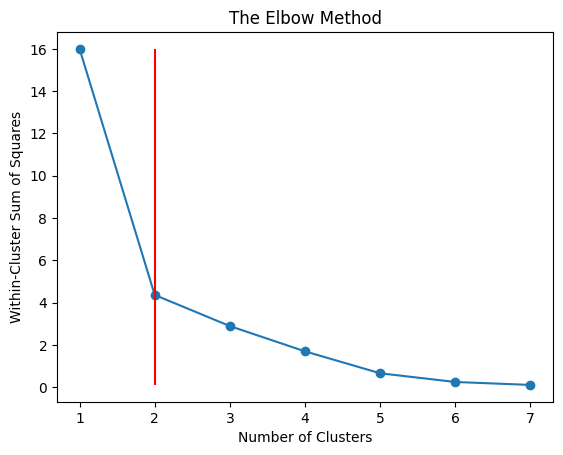

In [3542]:
df_cluster.iloc[:, [5,6]]
flight_priceSTD_data = df_cluster.iloc[:, [5,6]]
flight_priceSTD_data_scaled = scaler.fit_transform(flight_priceSTD_data)
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(flight_priceSTD_data_scaled)
    wcss.append(kmeans.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

In [3543]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(flight_priceSTD_data_scaled)
    score = silhouette_score(flight_priceSTD_data_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.5584510709839505
3 clusters silhouette score is 0.26931942626736705
4 clusters silhouette score is 0.2688025941790789
5 clusters silhouette score is 0.27334253830503474
6 clusters silhouette score is 0.11442674482907014
7 clusters silhouette score is 0.08656358021208797


In [3544]:
X = flight_priceSTD_data_scaled
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X)

# we reverse the scaler (AFTER the clusters have been made) so that visually we can see the correct units
X = scaler.inverse_transform(X)
kmeans.cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_)

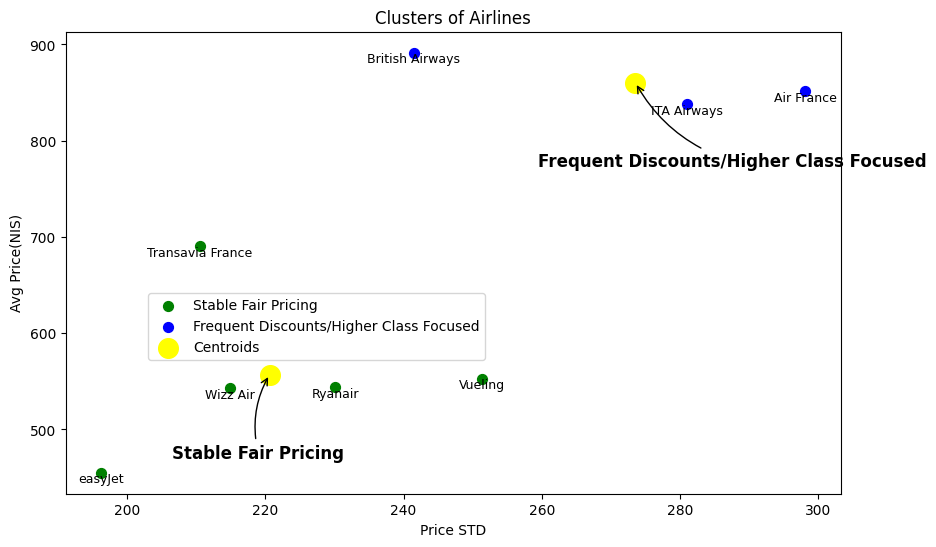

In [3545]:
# scatter plot for the clusters
plt.figure(figsize=(10,6))
label = ['Stable Fair Pricing', 'Frequent Discounts/Higher Class Focused']
plt.scatter(X[y_kmeans == 0,1], X[y_kmeans == 0,0], s = 50, c = 'green', label= 'Stable Fair Pricing',zorder=3)
plt.scatter(X[y_kmeans == 1,1], X[y_kmeans == 1,0], s = 50, c = 'blue', label= 'Frequent Discounts/Higher Class Focused',zorder=3)

plt.scatter(kmeans.cluster_centers_[: , 1], kmeans.cluster_centers_[: ,0], s=200, c='yellow', label='Centroids', zorder=1)

plt.title('Clusters of Airlines')
plt.xlabel('Price STD')
plt.ylabel('Avg Price(NIS)')

for i, txt in enumerate(flight_priceSTD_data.index):
    plt.text(X[i, 1], X[i, 0], txt, fontsize=9, ha='center', va='top', color='black')

for label,x,y in zip(label, kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0]):
    plt.annotate(label, xy=(x,y), xytext=(-70,-50), 
                va='top', fontsize=12, fontweight='bold', textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=-0.2'))

plt.legend(bbox_to_anchor=[0.55,0.45])
plt.show()

In [3546]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.313877
avgReturnFlightDurationMin    0.322174
avgTTT                       -0.678902
avgLOS                        0.383570
avgCarryOns                   0.866385
avgPrice                      1.000000
priceStd                      0.706924
flightsCount                 -0.691933
Name: avgPrice, dtype: float64

In [3547]:
'''We can clearly see the different strategies the airlines have when it comes to varrying the prices'''

'We can clearly see the different strategies the airlines have when it comes to varrying the prices'

In [3548]:
'''Next we will check how the flight duration dictates each airlines pricing'''

'Next we will check how the flight duration dictates each airlines pricing'

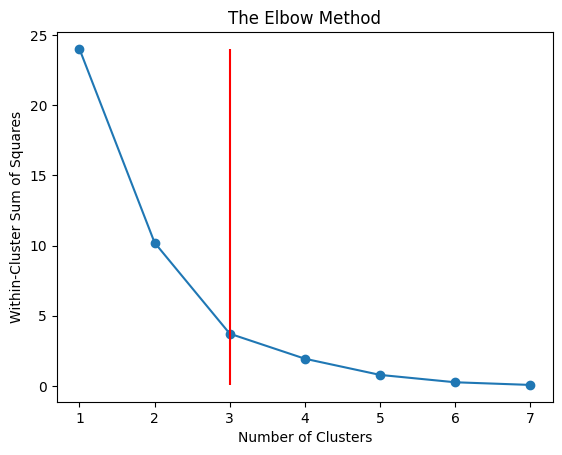

In [3549]:
flight_duration_data = df_cluster.iloc[:, [0,1,5]]
flight_duration_data_scaled = scaler.fit_transform(flight_duration_data)
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(flight_duration_data_scaled)
    wcss.append(kmeans.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

In [3550]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(flight_duration_data_scaled)
    score = silhouette_score(flight_duration_data_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.35990441090410796
3 clusters silhouette score is 0.5523597598845624
4 clusters silhouette score is 0.41802133918111295
5 clusters silhouette score is 0.28927308949252767
6 clusters silhouette score is 0.30661077423442573
7 clusters silhouette score is 0.2011512102518608


In [3551]:
# dimension reduction
pca = PCA(n_components=2)
X = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.97982766, 0.02017234])

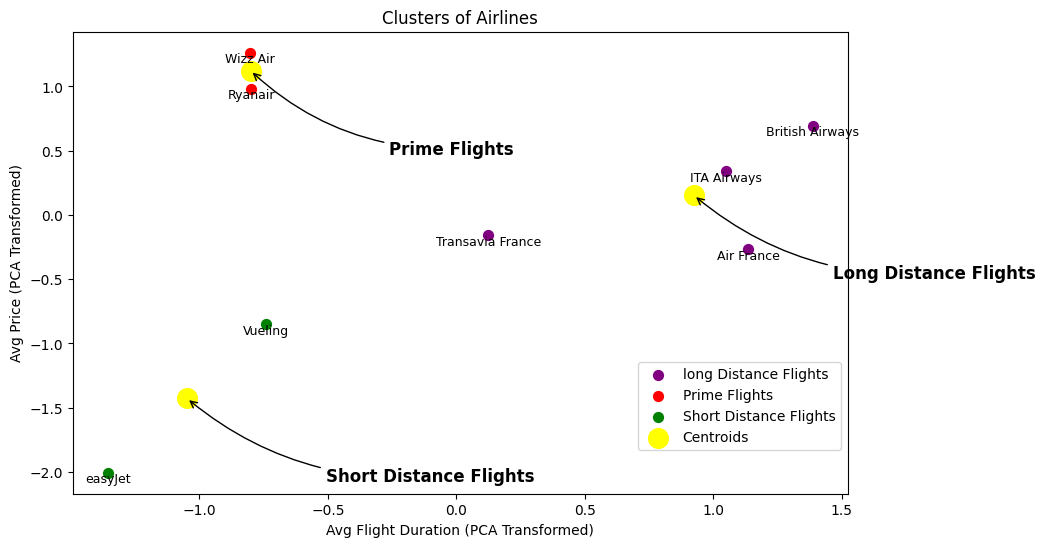

In [3552]:
# manual PCA:
PC1 = 0.5 * flight_duration_data_scaled[:, 0] + 0.5 * flight_duration_data_scaled[:, 1]  # 50% of Onward Duration and 50% of Return Duration
PC2 = flight_duration_data_scaled[:, 2]  # 100% of Price

custom_pca = np.vstack([PC1, PC2]).T  # Stack the two components

custom_pca_df = pd.DataFrame(custom_pca, columns=['PC1', 'PC2'])

# k-means
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(custom_pca)


# Scatter plot for the clusters
plt.figure(figsize=(10,6))
labels = ['Long Distance Flights', 'Prime Flights', 'Short Distance Flights']

plt.scatter(custom_pca_df.iloc[y_kmeans == 0, 1], custom_pca_df.iloc[y_kmeans == 0, 0], s=50, c='purple', label='long Distance Flights', zorder=3)
plt.scatter(custom_pca_df.iloc[y_kmeans == 1, 1], custom_pca_df.iloc[y_kmeans == 1, 0], s=50, c='red', label='Prime Flights', zorder=3)
plt.scatter(custom_pca_df.iloc[y_kmeans == 2, 1], custom_pca_df.iloc[y_kmeans == 2, 0], s=50, c='green', label='Short Distance Flights', zorder=3)

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, c='yellow', label='Centroids', zorder=1)

plt.title('Clusters of Airlines')
plt.xlabel('Avg Flight Duration (PCA Transformed)')
plt.ylabel('Avg Price (PCA Transformed)')

# Annotate the points with their labels
for i, txt in enumerate(flight_duration_data.index):
    plt.text(custom_pca_df.iloc[i,1], custom_pca_df.iloc[i,0], txt, fontsize=9, ha='center', va='top', color='black')

# Annotate the centroids
for label, x, y in zip(labels, kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0]):
    plt.annotate(label, xy=(x, y), xytext=(100, -50), 
                 va='top', fontsize=12, fontweight='bold', textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=-0.2'))

plt.legend(bbox_to_anchor=[1, 0.3])
plt.show()

In [3553]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.313877
avgReturnFlightDurationMin    0.322174
avgTTT                       -0.678902
avgLOS                        0.383570
avgCarryOns                   0.866385
avgPrice                      1.000000
priceStd                      0.706924
flightsCount                 -0.691933
Name: avgPrice, dtype: float64

In [3554]:
'''From this graph it seems that the longer the flight duration the higher the price.
However we understand that if the flight duration is the same, but the price is different, some factor must play a part.
We can rule out the flight times playing a major role in this because earlier we saw that the flight times didn't really correlate with the price.
These "outliers" are probably premium flights offering something that the others don't such as included carry-ons or other things that we will now check
Ofcourse because the correlation is not so high these are only partially true conclusions
'''

'From this graph it seems that the longer the flight duration the higher the price.\nHowever we understand that if the flight duration is the same, but the price is different, some factor must play a part.\nWe can rule out the flight times playing a major role in this because earlier we saw that the flight times didn\'t really correlate with the price.\nThese "outliers" are probably premium flights offering something that the others don\'t such as included carry-ons or other things that we will now check\nOfcourse because the correlation is not so high these are only partially true conclusions\n'

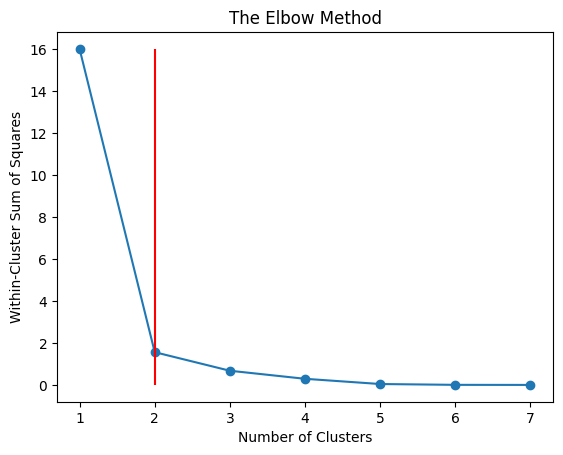

In [3555]:
# avg Carry-ons:
flight_carryOn_data = df_cluster.iloc[:, [4,5]]
flight_carryOn_data_scaled = scaler.fit_transform(flight_carryOn_data)
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(flight_carryOn_data_scaled)
    wcss.append(kmeans.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

In [3556]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(flight_carryOn_data_scaled)
    score = silhouette_score(flight_carryOn_data_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.7745003734106417
3 clusters silhouette score is 0.6182436766041994
4 clusters silhouette score is 0.6406987067564021
5 clusters silhouette score is 0.47963519913229014
6 clusters silhouette score is 0.4066926086461162
7 clusters silhouette score is 0.1849925216184406


In [3557]:
X = flight_carryOn_data_scaled
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X)

# we reverse the scaler (AFTER the clusters have been made) so that visually we can see the correct units
X = scaler.inverse_transform(X)
kmeans.cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_)

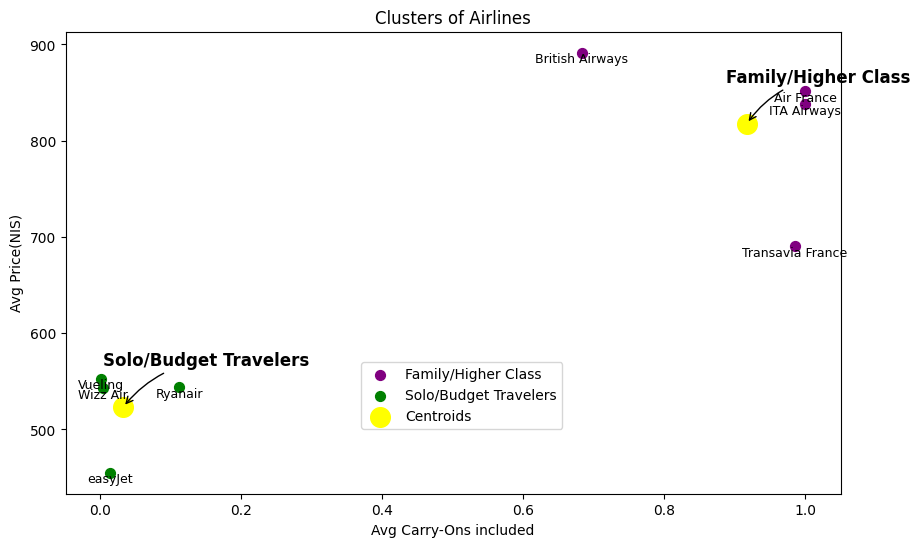

In [3558]:
# scatter plot for the clusters
plt.figure(figsize=(10,6))
label = ['Family/Higher Class', 'Solo/Budget Travelers']
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 50, c = 'purple', label= 'Family/Higher Class',zorder=3)
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 50, c = 'green', label= 'Solo/Budget Travelers',zorder=3)

plt.scatter(kmeans.cluster_centers_[: , 0], kmeans.cluster_centers_[: ,1], s=200, c='yellow', label='Centroids', zorder=1)

plt.title('Clusters of Airlines')
plt.xlabel('Avg Carry-Ons included')
plt.ylabel('Avg Price(NIS)')

for i, txt in enumerate(flight_carryOn_data.index):
    plt.text(X[i, 0], X[i, 1], txt, fontsize=9, ha='center', va='top', color='black')

for label,x,y in zip(label, kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-15,40), 
                va='top', fontsize=12, fontweight='bold', textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=0.2'))

plt.legend(bbox_to_anchor=[0.65,0.3])
plt.show()

In [3559]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.313877
avgReturnFlightDurationMin    0.322174
avgTTT                       -0.678902
avgLOS                        0.383570
avgCarryOns                   0.866385
avgPrice                      1.000000
priceStd                      0.706924
flightsCount                 -0.691933
Name: avgPrice, dtype: float64

In [3560]:
'''Because of the high correlation we know that Carry-ons included in the price effect the price heavily
We can cluster airlines into policys for types of traveler because of this.
Solo travelers who are looking for cheap flights might not want to spend extra for a carry-on while families and higher class people
wont mind paying extra so that they can bring a carry-on'''

'Because of the high correlation we know that Carry-ons included in the price effect the price heavily\nWe can cluster airlines into policys for types of traveler because of this.\nSolo travelers who are looking for cheap flights might not want to spend extra for a carry-on while families and higher class people\nwont mind paying extra so that they can bring a carry-on'

In [3561]:
'''next we will look at how the avg TTT of airlines contrast with the avg price'''

'next we will look at how the avg TTT of airlines contrast with the avg price'

In [3562]:
df_cluster.iloc[:, [2,5]]

,avgTTT,avgPrice
Airline,,
Air France,12.675191,851.589639
British Airways,12.190210,891.395204
ITA Airways,14.757976,837.912449
Ryanair,15.632330,543.843107
Transavia France,16.607347,690.466939
Vueling,15.583712,552.671495
Wizz Air,16.126573,542.656901
easyJet,14.730693,455.070443


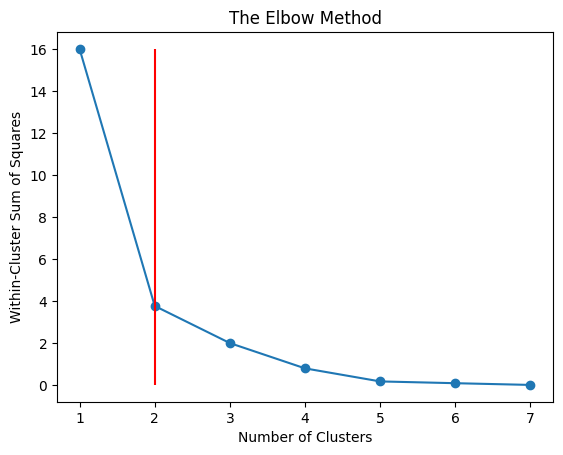

In [3563]:
# avg ttt
flight_ttt_data = df_cluster.iloc[:, [2,5]]
flight_ttt_data_scaled = scaler.fit_transform(flight_ttt_data)
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(flight_ttt_data_scaled)
    wcss.append(kmeans.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

In [3564]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(flight_ttt_data_scaled)
    score = silhouette_score(flight_ttt_data_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.6148147620106673
3 clusters silhouette score is 0.4375599876315146
4 clusters silhouette score is 0.4562780173904967
5 clusters silhouette score is 0.4520086695935419
6 clusters silhouette score is 0.2678040932475756
7 clusters silhouette score is 0.20409174507972555


In [3565]:
X = flight_ttt_data_scaled
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X)

# we reverse the scaler (AFTER the clusters have been made) so that visually we can see the correct units
X = scaler.inverse_transform(X)
kmeans.cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_)

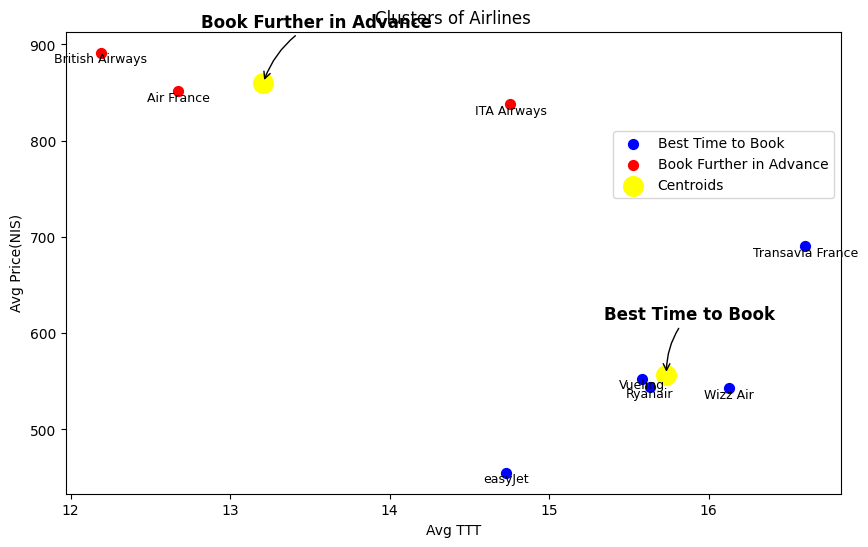

In [3566]:
# scatter plot for the clusters
plt.figure(figsize=(10,6))
label = ['Best Time to Book', 'Book Further in Advance', 'Best Time to Book', 'Stabaly Expensive']
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 50, c = 'blue', label= 'Best Time to Book',zorder=3)
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 50, c = 'red', label= 'Book Further in Advance',zorder=3)

plt.scatter(kmeans.cluster_centers_[: , 0], kmeans.cluster_centers_[: ,1], s=200, c='yellow', label='Centroids', zorder=1)

plt.title('Clusters of Airlines')
plt.xlabel('Avg TTT')
plt.ylabel('Avg Price(NIS)')

for i, txt in enumerate(flight_ttt_data.index):
    plt.text(X[i, 0], X[i, 1], txt, fontsize=9, ha='center', va='top', color='black')

for label,x,y in zip(label, kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-45,50), 
                va='top', fontsize=12, fontweight='bold', textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=0.2'))

plt.legend(bbox_to_anchor=[1,0.8])
plt.show()

In [3567]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.313877
avgReturnFlightDurationMin    0.322174
avgTTT                       -0.678902
avgLOS                        0.383570
avgCarryOns                   0.866385
avgPrice                      1.000000
priceStd                      0.706924
flightsCount                 -0.691933
Name: avgPrice, dtype: float64

In [3568]:
'''The correlation makes it easy to understand that mostly the further you book in advance the cheaper the flight will be
The airlines that are higher priced probably provide further benefits (included carry-ons/varied flight prices/luxery services...)'''

'The correlation makes it easy to understand that mostly the further you book in advance the cheaper the flight will be\nThe airlines that are higher priced probably provide further benefits (included carry-ons/varied flight prices/luxery services...)'

In [3569]:
'''finally we will check how the avg LOS affecs the price for the airlines.'''

'finally we will check how the avg LOS affecs the price for the airlines.'

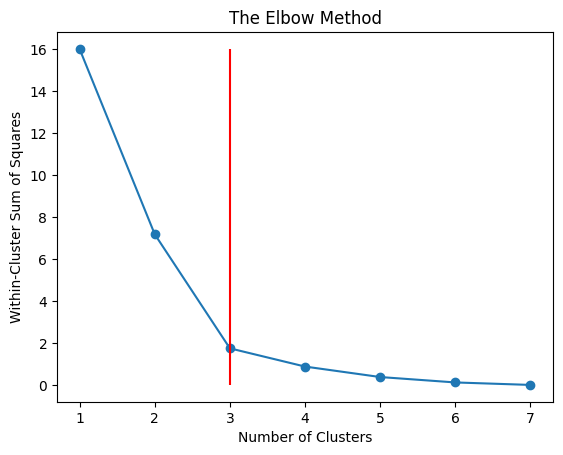

In [3570]:
# avg los
flight_los_data = df_cluster.iloc[:, [3,5]]
flight_los_data_scaled = scaler.fit_transform(flight_los_data)
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(flight_los_data_scaled)
    wcss.append(kmeans.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

In [3571]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(flight_los_data_scaled)
    score = silhouette_score(flight_los_data_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.5057432445413714
3 clusters silhouette score is 0.4736911520332126
4 clusters silhouette score is 0.3206501494624901
5 clusters silhouette score is 0.2712479026860817
6 clusters silhouette score is 0.16403009647346342
7 clusters silhouette score is 0.11146284167105014


In [3572]:
X = flight_los_data_scaled
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X)

# we reverse the scaler (AFTER the clusters have been made) so that visually we can see the correct units
X = scaler.inverse_transform(X)
kmeans.cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_)

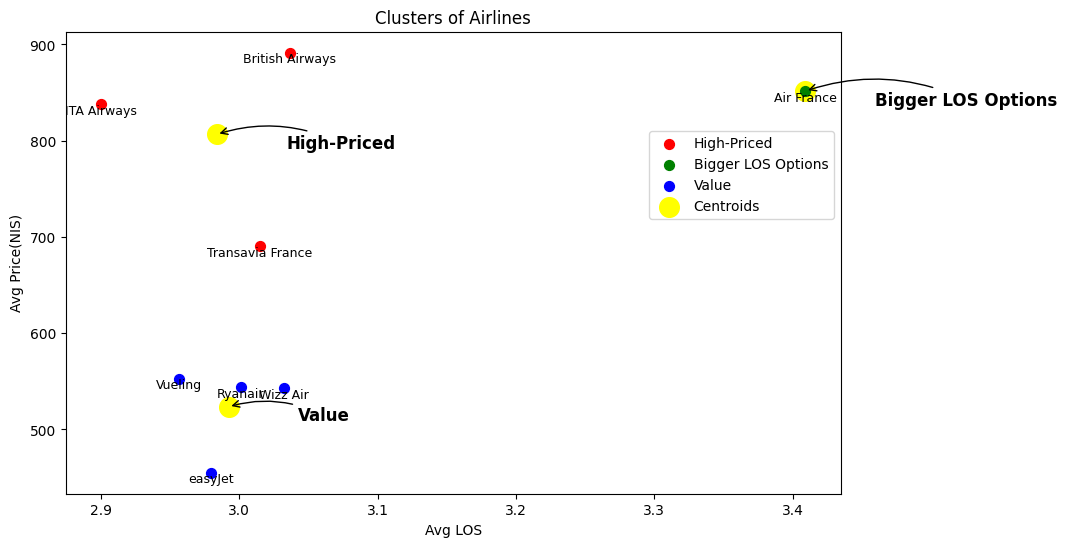

In [3573]:
# scatter plot for the clusters
plt.figure(figsize=(10,6))
label = ['High-Priced', 'Bigger LOS Options', 'Value']
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 50, c = 'red', label= 'High-Priced',zorder=3)
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 50, c = 'green', label= 'Bigger LOS Options',zorder=3)
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 50, c = 'blue', label= 'Value',zorder=3)

plt.scatter(kmeans.cluster_centers_[: , 0], kmeans.cluster_centers_[: ,1], s=200, c='yellow', label='Centroids', zorder=1)

plt.title('Clusters of Airlines')
plt.xlabel('Avg LOS')
plt.ylabel('Avg Price(NIS)')

for i, txt in enumerate(flight_los_data.index):
    plt.text(X[i, 0], X[i, 1], txt, fontsize=9, ha='center', va='top', color='black')

for label,x,y in zip(label, kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(50,0), 
                va='top', fontsize=12, fontweight='bold', textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=0.2'))

plt.legend(bbox_to_anchor=[1,0.8])
plt.show()

In [3574]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.313877
avgReturnFlightDurationMin    0.322174
avgTTT                       -0.678902
avgLOS                        0.383570
avgCarryOns                   0.866385
avgPrice                      1.000000
priceStd                      0.706924
flightsCount                 -0.691933
Name: avgPrice, dtype: float64

In [3575]:
'''The low correlation between the avg LOS and the avg price explains why the graph looks like this.
most of the airlines avg LOS is nearly the same yet different price ranges, with only Air France changing the correlation to be like this.
We can't really infer anything from this except maybe that Air France offers bigger LOS flights, but the price will be accordingly.'''

"The low correlation between the avg LOS and the avg price explains why the graph looks like this.\nmost of the airlines avg LOS is nearly the same yet different price ranges, with only Air France changing the correlation to be like this.\nWe can't really infer anything from this except maybe that Air France offers bigger LOS flights, but the price will be accordingly."